# Part I - (Flights  Report in the USA )
## by (Ugochukwu Okpoko)

## Introduction
> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. I have limted the review to just 3 years due to the size of the dataset. The different dataset can be obtained from this link; [Flight Data](dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2FHG7NV7&version=&q=&fileAccess=&fileTag=&fileSortField=&fileSortOrder=)

 ### Variable descriptions:
**The different variables are described as follow:**
* Year; 1987-2008 
* Month; 1-12 
* DayofMonth; 1-31 
* DayOfWeek; 1 (Monday) - 7 (Sunday) 
* DepTime; actual departure time (local, hhm m) 
* CRSDepTime; scheduled departure time (local, hhmm) 
* ArrTime; actual arrival time (local, hhmm) 
* CRSArrTime; scheduled arrival time (local, hhmm) 
* UniqueCarrier; unique carrier code 
* FlightNum; flight number 
* TailNum; plane tail number 
* ActualElapsedTime; in minutes 
* CRSElapsedTime; in minutes 
* AirTime; in minutes 
* ArrDelay; arrival delay, in minutes 
* DepDelay; departure delay, in minutes 
* Origin; origin IATA airport code 
* Dest; destination IATA airport code 
* Distance; in miles 
* TaxiIn; taxi in time, in minutes 
* TaxiOut; taxi out time in minutes 
* Cancelled; was the flight cancelled? 
* CancellationCode; reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
* Diverted; 1 = yes, 0 = no 
* CarrierDelay; in minutes 
* WeatherDelay; in minutes 
* NASDelay; in minutes 
* SecurityDelay; in minutes 
* LateAircraftDelay; in minutes



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import time
import sys
import os
import bz2
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sb.set_style('darkgrid')

In [3]:
# Extracting csv files from the downloaded BZip2 files.

# compressed_file =  ['c:\\users\\okpokou\\Documents\\udacity\\Project 3\\Compressed files\\1987.csv.bz2',
#                     'c:\\users\\okpokou\\Documents\\udacity\\Project 3\\Compressed files\\1988.csv.bz2',
#                     'c:\\users\\okpokou\\Documents\\udacity\\Project 3\\Compressed files\\1989.csv.bz2']

# new_file = ['c:\\users\\okpokou\\Documents\\udacity\\Project 3\\1987.csv',
#             'c:\\users\\okpokou\\Documents\\udacity\\Project 3\\1988.csv',
#            'c:\\users\\okpokou\\Documents\\udacity\\Project 3\\1989.csv']

# for i in range(len(compressed_file)):
#     file = new_file[i]
#     stream = bz2.BZ2File(compressed_file[i])
#     with open(file, 'wb') as f:
#         for i in range(1,1000000):
#             f.write(stream.readline())

In [4]:
# loading data into appropraite DataFrames.
df_1987 = pd.read_csv('1987.csv')
df_1988 = pd.read_csv('1988.csv')
df_1989 = pd.read_csv('1989.csv')

print('df_1987 shape: ',df_1987.shape)
print('df_1988 shape: ',df_1988.shape)
print('df_1989 shape: ',df_1989.shape)

carriers = pd.read_csv('c:\\users\\okpokou\\Documents\\udacity\\Project 3\\dataverse_files\\carriers.csv')
airports = pd.read_csv('c:\\users\\okpokou\\Documents\\udacity\\Project 3\\dataverse_files\\airports.csv')
plane_data = pd.read_csv('c:\\users\\okpokou\\Documents\\udacity\\Project 3\\dataverse_files\\plane-data.csv')

print('carriers shape: ',carriers.shape)
print('airports shape: ',airports.shape)
print('plane_data shape: ',plane_data.shape)

df_1987 shape:  (999998, 29)
df_1988 shape:  (999998, 29)
df_1989 shape:  (999998, 29)
carriers shape:  (1491, 2)
airports shape:  (3376, 7)
plane_data shape:  (5029, 9)


In [5]:
# confirming that the columns are the same for the different years.
sum(df_1987.columns == df_1988.columns , df_1989.columns == df_1987.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [6]:
df_1987 = df_1987.append(df_1988,ignore_index=True)
flights = df_1987.append(df_1989,ignore_index=True)
flights.shape

(2999994, 29)

In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999994 entries, 0 to 2999993
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            float64
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           float64
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   float64
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [8]:
flights.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                55424
CRSDepTime                 0
ArrTime                65560
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum              2999994
ActualElapsedTime      65560
CRSElapsedTime             0
AirTime              2999994
ArrDelay               65560
DepDelay               55424
Origin                     0
Dest                       0
Distance                1985
TaxiIn               2999994
TaxiOut              2999994
Cancelled                  0
CancellationCode     2999994
Diverted                   0
CarrierDelay         2999994
WeatherDelay         2999994
NASDelay             2999994
SecurityDelay        2999994
LateAircraftDelay    2999994
dtype: int64

In [9]:
flights.head(10)

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  1987     10          14          3    741.0         730    912.0   
1  1987     10          15          4    729.0         730    903.0   
2  1987     10          17          6    741.0         730    918.0   
3  1987     10          18          7    729.0         730    847.0   
4  1987     10          19          1    749.0         730    922.0   
5  1987     10          21          3    728.0         730    848.0   
6  1987     10          22          4    728.0         730    852.0   
7  1987     10          23          5    731.0         730    902.0   
8  1987     10          24          6    744.0         730    908.0   
9  1987     10          25          7    729.0         730    851.0   

   CRSArrTime UniqueCarrier  FlightNum  ...  TaxiIn  TaxiOut  Cancelled  \
0         849            PS       1451  ...     NaN      NaN          0   
1         849            PS       1451  ...     NaN      NaN          0   
2         849            PS       1451  ...     NaN      NaN          0   
3         849            PS       1451  ...     NaN      NaN          0   
4         849            PS       1451  ...     NaN      NaN          0   
5         849            PS       1451  ...     NaN      NaN          0   
6         849            PS       1451  ...     NaN      NaN          0   
7         849            PS       1451  ...     NaN      NaN          0   
8         849            PS       1451  ...     NaN      NaN          0   
9         849            PS       1451  ...     NaN      NaN          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0           NaN          NaN      NaN   
1               NaN         0           NaN          NaN      NaN   
2               NaN         0           NaN          NaN      NaN   
3               NaN         0           NaN          NaN      NaN   
4               NaN         0           NaN          NaN      NaN   
5               NaN         0           NaN          NaN      NaN   
6               NaN         0           NaN          NaN      NaN   
7               NaN         0           NaN          NaN      NaN   
8               NaN         0           NaN          NaN      NaN   
9               NaN         0           NaN          NaN      NaN   

   SecurityDelay  LateAircraftDelay  
0            NaN                NaN  
1            NaN                NaN  
2            NaN                NaN  
3            NaN                NaN  
4            NaN                NaN  
5            NaN                NaN  
6            NaN                NaN  
7            NaN                NaN  
8            NaN                NaN  
9            NaN                NaN  

[10 rows x 29 columns]

As observed, we have to extract another dataset as "no flights" were cancelled and the required variables for the analysis (reasons for the delay or cancelled flights) are NaNs.

In [10]:
# Extracting csv files from the downloaded BZip2 files.

# compressed_file =  ['c:\\users\\okpokou\\Documents\\udacity\\Project 3\\Compressed files\\2007.csv.bz2',
#                     'c:\\users\\okpokou\\Documents\\udacity\\Project 3\\Compressed files\\2008.csv.bz2',
#                     'c:\\users\\okpokou\\Documents\\udacity\\Project 3\\Compressed files\\2006.csv.bz2']

# new_file = ['c:\\users\\okpokou\\Documents\\udacity\\Project 3\\2007.csv',
#             'c:\\users\\okpokou\\Documents\\udacity\\Project 3\\2008.csv',
#            'c:\\users\\okpokou\\Documents\\udacity\\Project 3\\2006.csv']

# for i in range(len(compressed_file)):
#     file = new_file[i]
#     stream = bz2.BZ2File(compressed_file[i])
#     with open(file, 'wb') as f:
#         for i in range(1,2000000):
#             f.write(stream.readline())

In [11]:
# loading data into appropraite DataFrames.
df_06 = pd.read_csv('2006.csv')
df_07 = pd.read_csv('2007.csv')
df_08 = pd.read_csv('2008.csv')

print('df_06 shape: ',df_06.shape)
print('df_07 shape: ',df_07.shape)
print('df_08 shape: ',df_08.shape)

df_06 shape:  (1999998, 29)
df_07 shape:  (1999998, 29)
df_08 shape:  (1999998, 29)


In [12]:
# confirming that the columns are the same for the different years.
sum(df_06.columns == df_07.columns , df_08.columns == df_07.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [13]:
# Append the DataFrames into one Table.
df_06 = df_06.append(df_07,ignore_index=True)
flights = df_06.append(df_08,ignore_index=True)
flights.shape

(5999994, 29)

In [14]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999994 entries, 0 to 5999993
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [15]:
flights.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               149052
CRSDepTime                 0
ArrTime               162200
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                35786
ActualElapsedTime     162200
CRSElapsedTime           451
AirTime               162200
ArrDelay              162200
DepDelay              149052
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 61415
TaxiOut                56510
Cancelled                  0
CancellationCode     5850942
Diverted                   0
CarrierDelay         1500345
WeatherDelay         1500345
NASDelay             1500345
SecurityDelay        1500345
LateAircraftDelay    1500345
dtype: int64

In [16]:
# checking for duplicates.
flights.duplicated().sum()

10

In [17]:
flights[flights.duplicated()]

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
752508   2006      2          20          1   1204.0        1157   1244.0   
888040   2006      2          19          7    821.0         730    948.0   
1039373  2006      2          24          5    913.0         919      NaN   
1462456  2006      3          22          3    835.0         800   1101.0   
2354400  2007      1          14          7     35.0          35    618.0   
2356312  2007      1          21          7     32.0          35    621.0   
4937923  2008      2          28          4    829.0         835   1341.0   
4937925  2008      2          28          4   1427.0        1435   1640.0   
4937927  2008      2          28          4   1854.0        1807   1946.0   
4937929  2008      2          28          4   2027.0        1942   2314.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
752508         1240            OO       6117  ...    3.0      9.0          0   
888040          850            FL        768  ...   15.0     22.0          0   
1039373        1054            AS        152  ...    0.0     17.0          0   
1462456        1040            FL        762  ...    4.0     10.0          0   
2354400         605            F9        514  ...   37.0     12.0          0   
2356312         605            F9        514  ...   35.0     10.0          0   
4937923        1350            F9        728  ...    6.0     14.0          0   
4937925        1636            F9        727  ...    9.0     16.0          0   
4937927        1902            F9        773  ...    8.0     13.0          0   
4937929        2229            F9        780  ...   10.0     13.0          0   

         CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
752508                NaN         0           0.0          0.0      0.0   
888040                NaN         0           0.0          0.0      7.0   
1039373               NaN         1           0.0          0.0      0.0   
1462456               NaN         0          21.0          0.0      0.0   
2354400               NaN         0           0.0          0.0      0.0   
2356312               NaN         0           0.0          0.0     16.0   
4937923               NaN         0           NaN          NaN      NaN   
4937925               NaN         0           NaN          NaN      NaN   
4937927               NaN         0          44.0          0.0      0.0   
4937929               NaN         0           1.0          0.0     44.0   

         SecurityDelay  LateAircraftDelay  
752508             0.0                0.0  
888040             0.0               51.0  
1039373            0.0                0.0  
1462456            0.0                0.0  
2354400            0.0                0.0  
2356312            0.0                0.0  
4937923            NaN                NaN  
4937925            NaN                NaN  
4937927            0.0                0.0  
4937929            0.0                0.0  

[10 rows x 29 columns]

In [18]:
flights.sample(50)

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
717577   2006      2          19          7   1435.0        1440   1530.0   
4072884  2008      1          25          5    822.0         820    934.0   
3500346  2007      3           7          3    948.0         725   1100.0   
4807130  2008      2          27          3   1916.0        1920   1947.0   
5574449  2008      3          25          2   1255.0        1300   1451.0   
1646761  2006      3          29          3    727.0         730   1000.0   
5397729  2008      3          19          3   2053.0        2045    455.0   
2140549  2007      1          14          7   2050.0        2010   2120.0   
3934489  2007      4          13          5   1613.0        1410   1823.0   
2934497  2007      2          25          7   1308.0        1210   1441.0   
1789015  2006      4          13          4   1435.0        1435   1505.0   
576511   2006      1          26          4   1142.0        1150   2024.0   
3653096  2007      3          16          5    833.0         835   1009.0   
226656   2006      1          25          3    837.0         840   1110.0   
4372448  2008      1          28          1   1054.0        1049   1200.0   
656191   2006      2          16          4   1550.0        1510   1659.0   
5105770  2008      2           8          5   1440.0        1445   2146.0   
1827096  2006      4          26          3   1235.0        1240   1840.0   
2554965  2007      1           8          1    659.0         700    931.0   
499382   2006      1          22          7   2055.0        2035   2217.0   
4094394  2008      1          25          5   1120.0        1120   1222.0   
5205854  2008      3          12          3   1952.0        1935   2156.0   
2226114  2007      1          26          5   2119.0        2130    445.0   
2795991  2007      2           9          5    828.0         830    955.0   
185704   2006      1          21          6    640.0         635    737.0   
4227708  2008      1          11          5    758.0         800   1107.0   
1879743  2006      4           1          6   1314.0        1323   1336.0   
5311756  2008      3           7          5   1831.0        1830   1915.0   
2687216  2007      2          22          4    704.0         705    904.0   
2120125  2007      1           8          1      NaN        1435      NaN   
1890008  2006      4           8          6   1722.0        1554   1831.0   
2833812  2007      2           9          5   1743.0        1745   1937.0   
3338751  2007      3          22          4   1031.0        1029   1251.0   
2220451  2007      1          29          1    529.0         530    606.0   
5958431  2008      4           4          5   1952.0        1947   2029.0   
3943773  2007      4          21          6   1139.0        1140   1328.0   
1471149  2006      3          14          2   1713.0        1705   1757.0   
4808035  2008      2          28          4   1834.0        1838   1925.0   
5313765  2008      3          10          1   2005.0        2005   2105.0   
380532   2006      1           7          6    638.0         643    720.0   
1553469  2006      3          20          1    904.0         908   1104.0   
2965858  2007      2          24          6    925.0         925   1116.0   
3050093  2007      2           6          2    600.0         605    755.0   
4373224  2008      1          29          2   1353.0        1400   1558.0   
459364   2006      1          23          1    554.0         600    730.0   
666956   2006      2          20          1   2205.0        2115   2230.0   
1849808  2006      4          13          4   1645.0        1645   1806.0   
5567552  2008      3          25          2    801.0         805    926.0   
1741755  2006      4          14          5   1519.0        1520   1622.0   
405706   2006      1          20          5   1412.0        1408   1526.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
7

In [19]:
flights.describe()

Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  5.999994e+06  5.999994e+06  5.999994e+06  5.999994e+06  5.850942e+06   
mean   2.007000e+03  2.230244e+00  1.563305e+01  3.924221e+00  1.342737e+03   
std    8.164966e-01  1.000848e+00  8.712456e+00  1.987410e+00  4.769305e+02   
min    2.006000e+03  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.006000e+03  1.000000e+00  8.000000e+00  2.000000e+00  9.330000e+02   
50%    2.007000e+03  2.000000e+00  1.600000e+01  4.000000e+00  1.333000e+03   
75%    2.008000e+03  3.000000e+00  2.300000e+01  6.000000e+00  1.734000e+03   
max    2.008000e+03  4.000000e+00  3.100000e+01  7.000000e+00  2.755000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  5.999994e+06  5.837794e+06  5.999994e+06  5.999994e+06   
mean   1.332761e+03  1.489363e+03  1.497670e+03  2.280889e+03   
std    4.633683e+02  5.020008e+02  4.804109e+02  2.016044e+03   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    9.300000e+02  1.113000e+03  1.118000e+03  6.250000e+02   
50%    1.325000e+03  1.518000e+03  1.520000e+03  1.591000e+03   
75%    1.720000e+03  1.913000e+03  1.910000e+03  3.679000e+03   
max    2.359000e+03  2.923000e+03  2.400000e+03  9.740000e+03   

       ActualElapsedTime  ...      Distance        TaxiIn       TaxiOut  \
count       5.837794e+06  ...  5.999994e+06  5.938579e+06  5.943484e+06   
mean        1.250645e+02  ...  7.082536e+02  6.644308e+00  1.577898e+01   
std         6.970250e+01  ...  5.514096e+02  1.755335e+01  1.080802e+01   
min         1.000000e+01  ...  1.100000e+01  0.000000e+00  0.000000e+00   
25%         7.500000e+01  ...  3.160000e+02  4.000000e+00  1.000000e+01   
50%         1.070000e+02  ...  5.520000e+02  5.000000e+00  1.300000e+01   
75%         1.560000e+02  ...  9.380000e+02  8.000000e+00  1.900000e+01   
max         1.760000e+03  ...  4.962000e+03  1.470000e+03  6.020000e+02   

          Cancelled      Diverted  CarrierDelay  WeatherDelay      NASDelay  \
count  5.999994e+06  5.999994e+06  4.499649e+06  4.499649e+06  4.499649e+06   
mean   2.484202e-02  2.191336e-03  4.834934e+00  9.635978e-01  4.811443e+00   
std    1.556435e-01  4.676039e-02  2.244798e+01  1.076476e+01  1.769023e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00  1.000000e+00  1.490000e+03  1.148000e+03  1.374000e+03   

       SecurityDelay  LateAircraftDelay  
count   4.499649e+06       4.499649e+06  
mean    3.183337e-02       6.473191e+00  
std     1.258402e+00       2.349534e+01  
min     0.000000e+00       0.000000e+00  
25%     0.000000e+00       0.000000e+00  
50%     0.000000e+00       0.000000e+00  
75%     0.000000e+00       0.000000e+00  
max     3.820000e+02       1.254000e+03  

[8 rows x 24 columns]

In [20]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [21]:
# 1-D exploration of hidden colomns.

hidden_columns =['TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 
                 'AirTime', 'ArrDelay','DepDelay', 'Origin', 'Dest', 'Distance']
flights[hidden_columns].head(10)

TailNum  ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  \
0  N657AW              281.0           273.0    223.0       6.0      -2.0   
1  N834AW              260.0           265.0    214.0      -5.0       0.0   
2  N605AW              235.0           258.0    220.0     -23.0       0.0   
3  N312AW              152.0           158.0    126.0      -8.0      -2.0   
4  N309AW              171.0           163.0    132.0       0.0      -8.0   
5  N733UW              127.0           122.0    108.0       2.0      -3.0   
6  N177UW              136.0           121.0    111.0      20.0       5.0   
7  N404US              133.0           123.0    121.0       7.0      -3.0   
8  N722UW              119.0           120.0    103.0      -7.0      -6.0   
9  N104UW              119.0           120.0    105.0      -4.0      -3.0   

  Origin Dest  Distance  
0    ATL  PHX      1587  
1    ATL  PHX      1587  
2    ATL  PHX      1587  
3    AUS  PHX       872  
4    AUS  PHX       872  
5    BDL  CLT       644  
6    BDL  CLT       644  
7    BDL  CLT       644  
8    BDL  CLT       644  
9    BDL  CLT       644

In [22]:
flights[hidden_columns].describe()

ActualElapsedTime  CRSElapsedTime       AirTime      ArrDelay  \
count       5.837794e+06    5.999543e+06  5.837794e+06  5.837794e+06   
mean        1.250645e+02    1.263267e+02  1.022940e+02  9.370251e+00   
std         6.970250e+01    6.899270e+01  6.958875e+01  3.775493e+01   
min         1.000000e+01   -1.240000e+03 -1.419000e+03 -5.750000e+02   
25%         7.500000e+01    7.600000e+01  5.400000e+01 -9.000000e+00   
50%         1.070000e+02    1.080000e+02  8.400000e+01 -1.000000e+00   
75%         1.560000e+02    1.560000e+02  1.310000e+02  1.400000e+01   
max         1.760000e+03    1.435000e+03  1.710000e+03  2.461000e+03   

           DepDelay      Distance  
count  5.850942e+06  5.999994e+06  
mean   1.091705e+01  7.082536e+02  
std    3.469922e+01  5.514096e+02  
min   -1.197000e+03  1.100000e+01  
25%   -4.000000e+00  3.160000e+02  
50%    0.000000e+00  5.520000e+02  
75%    1.000000e+01  9.380000e+02  
max    2.457000e+03  4.962000e+03

As observed, the stated delay time for some samples on the hidden columns are in negative. These points should be looked at closely for a decision (modification or filtering) to be reached.

In [23]:
flights.CancellationCode.value_counts()

B    69560
A    54060
C    25304
D      128
Name: CancellationCode, dtype: int64

In [24]:
flights.UniqueCarrier.value_counts()

WN    1118872
OO     508367
AA     473161
XE     414659
US     399459
UA     397127
MQ     389270
DL     361303
NW     301192
YV     284542
OH     231356
CO     230282
EV     204368
FL     181396
B6     131005
9E     129657
AS     112568
F9      66054
HA      39280
AQ      19172
TZ       6904
Name: UniqueCarrier, dtype: int64

In [25]:
# check for samples where the local time (HH:MM) are out of the expected 24 hours range.
print(flights.ArrTime.min(),flights.ArrTime.max())
print(flights.CRSArrTime.min(),flights.CRSArrTime.max())
print(flights.DepTime.min(),flights.DepTime.max())
print(flights.CRSDepTime.min(),flights.CRSDepTime.max())

1.0 2923.0
1 2400
1.0 2755.0
0 2359


Departure time looks okay, however, the other variables are outside the possible 24 hours per day range. This must be reviewed (modified or dropped).

In [26]:
# Exploring the other DataFrames

print('carriers shape: ',carriers.shape)
carriers.sample(10)

carriers shape:  (1491, 2)


Code                 Description
367      CLB   Columbia Pacific Airlines
1423     XAU            Flight Line Inc.
142      AEX          Air Excursions LLC
1419     XAQ  Cam Air International Inc.
1085      RL                     UltrAir
969      PAI        Permian Airways Inc.
905      NKQ                   Norcanair
979   PD (1)             Pem-Air Limited
374      CMQ  Servicio De Carga Aerea Sa
1392      WP           Island Air Hawaii

In [27]:
print('airports shape: ',airports.shape)
airports.sample(10)

airports shape:  (3376, 7)


iata               airport              city state country        lat  \
3199  UGN     Waukegan Regional  Chicago/Waukegan    IL     USA  42.422160   
2516  ONP          Newport Muni           Newport    OR     USA  44.580361   
1838  IAN    Bob Baker Memorial             Kiana    AK     USA  66.979376   
748   A29             Sitka SPB             Sitka    AK     USA  57.052138   
3314  X07  Lake Wales Municipal        Lake Wales    FL     USA  27.893806   
3104  TIX   Space Cost Regional        Titusville    FL     USA  28.514799   
1209  CWI     Clinton Municipal           Clinton    IA     USA  41.831113   
1897  IWK                 Wales             Wales    AK     USA  65.623940   
2741  Q95                  Ruth              Ruth    CA     USA  40.211259   
2669  PRN  Greenville Municipal        Greenville    AL     USA  31.845402   

            long  
3199  -87.867907  
2516 -124.057917  
1838 -160.435860  
748  -135.346209  
3314  -81.620389  
3104  -80.799228  
1209  -90.329131  
1897 -168.099172  
2741 -123.297523  
2669  -86.610446

In [28]:
print('plane_data shape: ',plane_data.shape)
plane_data.sample(10)

plane_data shape:  (5029, 9)


tailnum         type      manufacturer  issue_date     model status  \
3616   N755US  Corporation  AIRBUS INDUSTRIE  11/16/2000  A319-112  Valid   
3893   N7BHAA          NaN               NaN         NaN       NaN    NaN   
1316   N363NB  Corporation            AIRBUS  06/20/2003  A319-114  Valid   
820    N26226  Corporation            BOEING  12/23/1998   737-824  Valid   
3367   N705AS  Corporation            BOEING  07/08/1998   737-490  Valid   
4721    N9337          NaN               NaN         NaN       NaN    NaN   
3552   N741UW  Corporation  AIRBUS INDUSTRIE  08/11/2000  A319-112  Valid   
4559  N91629E          NaN               NaN         NaN       NaN    NaN   
3870   N7AGAA          NaN               NaN         NaN       NaN    NaN   
3602   N753SW  Corporation            BOEING  12/03/1999   737-7H4  Valid   

                aircraft_type engine_type  year  
3616  Fixed Wing Multi-Engine   Turbo-Jet  2000  
3893                      NaN         NaN   NaN  
1316  Fixed Wing Multi-Engine   Turbo-Fan  2003  
820   Fixed Wing Multi-Engine   Turbo-Fan  1998  
3367  Fixed Wing Multi-Engine   Turbo-Jet  1998  
4721                      NaN         NaN   NaN  
3552  Fixed Wing Multi-Engine   Turbo-Jet  2000  
4559                      NaN         NaN   NaN  
3870                      NaN         NaN   NaN  
3602  Fixed Wing Multi-Engine   Turbo-Fan  1999

In [29]:
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [30]:
# checking columns be to utilize for merging the different DataFrames.
flights.Origin.value_counts(), airports.iata.value_counts(), carriers.Code.value_counts()

(ATL    300773
 ORD    295966
 DFW    218075
 DEN    193324
 LAX    191008
         ...  
 HKY        42
 EAU        36
 RHI        34
 SOP        13
 HVN         3
 Name: Origin, Length: 301, dtype: int64,
 00M    1
 MKT    1
 MHL    1
 MHM    1
 MHP    1
       ..
 CKF    1
 CKI    1
 CKM    1
 CKN    1
 ZZV    1
 Name: iata, Length: 3376, dtype: int64,
 02Q    1
 PHL    1
 PLA    1
 PL     1
 PKQ    1
       ..
 ENT    1
 EMP    1
 EME    1
 EMA    1
 ZYZ    1
 Name: Code, Length: 1490, dtype: int64)

In [31]:
print(flights.TailNum.value_counts(), plane_data.tailnum.value_counts())

0         59529
000000     6365
N308SW     3477
N485HA     3058
N234SW     3026
          ...  
N194JB        1
N702DN        1
N37018        1
N853NW        1
N74007        1
Name: TailNum, Length: 5855, dtype: int64 N050AA    1
N702TW    1
N703MR    1
N703JB    1
N703AS    1
         ..
N410UA    1
N410SW    1
N410AA    1
N409WN    1
N999DN    1
Name: tailnum, Length: 5029, dtype: int64


In [32]:
# Confirming that iata codes in airports DataFrame 
# is same as Origin and Destination columns in Flights.
check = airports.iata.values
flights[['Origin','Dest']].isin(check).sum()

Origin    5999994
Dest      5999994
dtype: int64

In [33]:
# Confirming that code column in Carriers DataFrame 
# is same as UniqueCarrier columns in Flights.
check = carriers['Code'].values
flights['UniqueCarrier'].isin(check).sum()

5999994

In [34]:
# Confirming that tailnum column in plane-data DataFrame 
# is same as tailnum column in Flights.
check = plane_data['tailnum'].values
flights['TailNum'].isin(check).sum()

5232742

We can merge the different DataFrames with the identified columns

## Wrangling Steps.

#### Flights DataFrame

* Filter the DataFrame for only the necessary columns
* Drop duplicates.
* 'Year', 'Month', 'DayofMonth' columns should be one variable (date) and a datetime variable.
* 'CRSDepTime' columns should be converted to proper time (HH:MM) or just HH.
* Drop or modify irrelevant rows; samples with negative time and samples with time outside the 24 hours range.
* Delay columns ('CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay') should be dropped; Cancellation code is enough for this analysis.
* The NaNs on the CancellationCode column should be replaced with "None" or filtered out, as they correspond to completed flights.
* Add the full name for each state. For a quick aid, check this [link](docs.google.com/spreadsheets/d/14wvnQygIX1eCVo7H5B7a96W1v5VCg6Q9yeRoESF6epw/edit#gid=0)
* Add an airpot column for each sample's Destination airport.

We can merge the different DataFrames with the identified columns; 

* We will merge the Flights Table with Airports Table on the Origin and iata columns, respectively.
* We will aslo merge the Flight Table and the Carriers Table on the UniqueCarrier and Code columns, respectively.
* Finally, we will merge the Flight Table and the Plane data Table on the TailNum and tailnum columns, respectively.

In [35]:
# create a copy of the flight data before wrangling process.

flight_data = flights.copy()
flight_data.shape

(5999994, 29)

####  Wrangling step 1
* Merging the different DataFrames
* Filtering the DataFrame for only relevant columns
* Drop columns that are already represented: 'UniqueCarrier' == "Description"; 'Origin' == "airport" | "city". 


In [36]:
# merging the DataFrames.
flight_data = flight_data.merge(right= airports, how= 'inner', left_on= 'Origin', right_on= 'iata')
flight_data = flight_data.merge(right= carriers, how= 'inner', left_on= 'UniqueCarrier', right_on= 'Code')
flight_data = flight_data.merge(right= plane_data, how= 'inner', left_on= 'TailNum', right_on= 'tailnum')
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5232742 entries, 0 to 5232741
Data columns (total 47 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [37]:
flight_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'iata', 'airport', 'city', 'state', 'country', 'lat', 'long', 'Code',
       'Description', 'tailnum', 'type', 'manufacturer', 'issue_date', 'model',
       'status', 'aircraft_type', 'engine_type', 'year'],
      dtype='object')

We will not include all of the columns, as only a few are required for our analysis


In [38]:
# Filtering the Flight DataFrame for only relevant columns
required_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime','UniqueCarrier',
                    'Origin', 'Dest', 'Distance', 'Cancelled',  'CancellationCode', 'Diverted',
                    'airport', 'city', 'state','Description', 'type',  'manufacturer', 
                    'aircraft_type', 'engine_type', 'year']

flight_data = flight_data[required_columns]

In [39]:
# Checking the flight Dataframe for changes.
flight_data.sample(20)

Year  Month  DayofMonth  DayOfWeek  CRSDepTime UniqueCarrier Origin  \
1516486  2006      4          25          2         625            UA    LAX   
4605329  2008      3          20          4         700            WN    SLC   
3921183  2006      3           1          3        1315            OO    SLC   
4422176  2007      3          21          3        1455            WN    RNO   
3717508  2007      2           8          4        1834            OO    CID   
3518461  2008      3          21          5        1155            CO    SAT   
4542406  2008      3          19          3         825            WN    ELP   
595107   2007      1          21          7        1115            OH    RDU   
4426053  2008      3           4          2        1850            WN    LAS   
2234693  2006      1          10          2        1842            FL    LGA   
36177    2008      1          24          4         940            US    LAS   
4109404  2006      3          16          4         600            OO    SBA   
3919549  2007      3          31          6        2020            OO    PHX   
2358937  2007      2          16          5         740            FL    MDW   
3418836  2006      1          20          5         728            AA    MCO   
4937455  2008      4          14          1         810            WN    MDW   
3178502  2007      3          13          2         700            AA    BUR   
2770346  2008      3          20          4        1913            NW    DTW   
690222   2006      1           8          7        2015            OH    CVG   
2713274  2006      2          17          5        1146            MQ    SJT   

        Dest  Distance  Cancelled  ... Diverted  \
1516486  ORD      1745          0  ...        0   
4605329  DEN       391          0  ...        0   
3921183  SAT      1086          0  ...        0   
4422176  LAS       345          0  ...        0   
3717508  DEN       692          0  ...        0   
3518461  IAH       191          0  ...        0   
4542406  LAX       714          0  ...        0   
595107   LGA       431          0  ...        0   
4426053  PHX       256          0  ...        0   
2234693  PHF       288          0  ...        0   
36177    DFW      1055          0  ...        0   
4109404  LAX        89          0  ...        0   
3919549  LAX       370          0  ...        0   
2358937  MIA      1182          0  ...        0   
3418836  STL       880          0  ...        0   
4937455  LAS      1521          0  ...        0   
3178502  DFW      1231          0  ...        0   
2770346  MKE       238          0  ...        0   
690222   SAV       515          0  ...        0   
2713274  DFW       228          0  ...        0   

                                   airport            city state  \
1516486          Los Angeles International     Los Angeles    CA   
4605329                Salt Lake City Intl  Salt Lake City    UT   
3921183                Salt Lake City Intl  Salt Lake City    UT   
4422176           Reno/Tahoe International            Reno    NV   
3717508                      Eastern Iowa     Cedar Rapids    IA   
3518461          San Antonio International     San Antonio    TX   
4542406              El Paso International         El Paso    TX   
595107        Raleigh-Durham International         Raleigh    NC   
4426053             McCarran International       Las Vegas    NV   
2234693                          LaGuardia        New York    NY   
36177               McCarran International       Las Vegas    NV   
4109404            Santa Barbara Municipal   Santa Barbara    CA   
3919549   Phoenix Sky Harbor International         Phoenix    AZ   
2358937                     Chicago Midway         Chicago    IL   
3418836              Orlando International         Orlando    FL   
4937455                     Chicago Midway         Chicago    IL   
3178502          Burbank-Glendale-Pasadena         Burbank    CA   
2770346  Detroit Metropolitan-Wa

In [40]:
# confirming that the UniqueCarrier column matches with the Description column
# This provides information on the Airlines.
flight_data.query('UniqueCarrier == "OO"')

Year  Month  DayofMonth  DayOfWeek  CRSDepTime UniqueCarrier Origin  \
607769   2007      3          29          4         730            OO    AUS   
607770   2008      1           1          2        1800            OO    AUS   
607771   2008      1          16          3         800            OO    AUS   
607772   2008      1          17          4        1755            OO    AUS   
607773   2008      1          27          7        1755            OO    AUS   
...       ...    ...         ...        ...         ...           ...    ...   
4156737  2008      4          19          6         944            OO    MOD   
4156738  2008      4          27          7        1703            OO    MOD   
4156739  2008      4          28          1        1703            OO    MOD   
4156740  2008      4           2          3         944            OO    MOD   
4156741  2008      4          14          1         921            OO    MOD   

        Dest  Distance  Cancelled  ... Diverted  \
607769   SLC      1085          0  ...        0   
607770   SLC      1085          0  ...        0   
607771   SLC      1085          0  ...        0   
607772   SLC      1085          0  ...        0   
607773   SLC      1085          0  ...        0   
...      ...       ...        ...  ...      ...   
4156737  LAX       292          0  ...        0   
4156738  SFO        78          0  ...        0   
4156739  SFO        78          0  ...        0   
4156740  LAX       292          0  ...        0   
4156741  SFO        78          0  ...        0   

                                 airport     city state  \
607769    Austin-Bergstrom International   Austin    TX   
607770    Austin-Bergstrom International   Austin    TX   
607771    Austin-Bergstrom International   Austin    TX   
607772    Austin-Bergstrom International   Austin    TX   
607773    Austin-Bergstrom International   Austin    TX   
...                                  ...      ...   ...   
4156737  Modesto City-County-Harry Sham   Modesto    CA   
4156738  Modesto City-County-Harry Sham   Modesto    CA   
4156739  Modesto City-County-Harry Sham   Modesto    CA   
4156740  Modesto City-County-Harry Sham   Modesto    CA   
4156741  Modesto City-County-Harry Sham   Modesto    CA   

                   Description         type    manufacturer  \
607769   Skywest Airlines Inc.  Corporation  BOMBARDIER INC   
607770   Skywest Airlines Inc.  Corporation  BOMBARDIER INC   
607771   Skywest Airlines Inc.  Corporation  BOMBARDIER INC   
607772   Skywest Airlines Inc.  Corporation  BOMBARDIER INC   
607773   Skywest Airlines Inc.  Corporation  BOMBARDIER INC   
...                        ...          ...             ...   
4156737  Skywest Airlines Inc.  Corporation         EMBRAER   
4156738  Skywest Airlines Inc.  Corporation         EMBRAER   
4156739  Skywest Airlines Inc.  Corporation         EMBRAER   
4156740  Skywest Airlines Inc.  Corporation         EMBRAER   
4156741  Skywest Airlines Inc.  Corporation         EMBRAER   

                   aircraft_type engine_type  year  
607769   Fixed Wing Multi-Engine   Turbo-Fan  2004  
607770   Fixed Wing Multi-Engine   Turbo-Fan  2004  
607771   Fixed Wing Multi-Engine   Turbo-Fan  2004  
607772   Fixed Wing Multi-Engine   Turbo-Fan  2004  
607773   Fixed Wing Multi-Engine   Turbo-Fan  2004  
...                          ...         ...   ...  
4156737  Fixed Wing Multi-Engine  Turbo-Prop  1996  
4156738  Fixed Wing Multi-Engine  Turbo-Prop  1996  
4156739  Fixed Wing Multi-Engine  Turbo-Prop  1996  
4156740  Fixed Wing Multi-Engine  Turbo-Prop  1996  
4156741  Fixed Wing Multi-Engine  Turbo-Prop  1996  

[495430 rows x 21 columns]

In [41]:
# confirming that the Origin column matches with the airport or city column
# This provides information on the Airport (takeoff).
flight_data.query('Origin == "SFO"')

Year  Month  DayofMonth  DayOfWeek  CRSDepTime UniqueCarrier Origin  \
1025     2006      1          28          6         900            US    SFO   
1026     2006      2          16          4         600            US    SFO   
1027     2006      4           4          2         600            US    SFO   
1028     2006      4          28          5         700            US    SFO   
1029     2007      2           8          4         938            US    SFO   
...       ...    ...         ...        ...         ...           ...    ...   
5215512  2008      3           8          6         830            HA    SFO   
5215513  2008      3          11          2         850            HA    SFO   
5215514  2008      3          17          1         850            HA    SFO   
5215515  2008      3          18          2         850            HA    SFO   
5215516  2008      3          29          6         850            HA    SFO   

        Dest  Distance  Cancelled  ... Diverted                      airport  \
1025     PHX       651          0  ...        0  San Francisco International   
1026     PHX       651          0  ...        0  San Francisco International   
1027     PHX       651          0  ...        0  San Francisco International   
1028     LAS       414          0  ...        0  San Francisco International   
1029     LAS       414          0  ...        0  San Francisco International   
...      ...       ...        ...  ...      ...                          ...   
5215512  HNL      2398          0  ...        0  San Francisco International   
5215513  HNL      2398          0  ...        0  San Francisco International   
5215514  HNL      2398          0  ...        0  San Francisco International   
5215515  HNL      2398          0  ...        0  San Francisco International   
5215516  HNL      2398          0  ...        0  San Francisco International   

                  city state  \
1025     San Francisco    CA   
1026     San Francisco    CA   
1027     San Francisco    CA   
1028     San Francisco    CA   
1029     San Francisco    CA   
...                ...   ...   
5215512  San Francisco    CA   
5215513  San Francisco    CA   
5215514  San Francisco    CA   
5215515  San Francisco    CA   
5215516  San Francisco    CA   

                                               Description         type  \
1025     US Airways Inc. (Merged with America West 9/05...  Corporation   
1026     US Airways Inc. (Merged with America West 9/05...  Corporation   
1027     US Airways Inc. (Merged with America West 9/05...  Corporation   
1028     US Airways Inc. (Merged with America West 9/05...  Corporation   
1029     US Airways Inc. (Merged with America West 9/05...  Corporation   
...                                                    ...          ...   
5215512                             Hawaiian Airlines Inc.  Corporation   
5215513                             Hawaiian Airlines Inc.  Corporation   
5215514                             Hawaiian Airlines Inc.  Corporation   
5215515                             Hawaiian Airlines Inc.  Corporation   
5215516                             Hawaiian Airlines Inc.  Corporation   

             manufacturer            aircraft_type engine_type  year  
1025     AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999  
1026     AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999  
1027     AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999  
1028     AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999  
1029     AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999  
...                   ...                      ...         ...   ...  
5215512            BOEING  Fixed Wing Multi-Engine   Turbo-Fan  1986  
5215513            BOEING  Fixed Wing Multi-Engine   Turbo-Fan  1986  
5215514            BOEING  Fixed Wing Multi-Engine   Turbo-Fan  1986  
5215515            BOEING  Fixed Wing Multi-Engine   Turbo-Fan  1986  
5215516            B

We can drop the Origin and UniqueCarrier columns.

In [42]:
flight_data.drop(columns = ['UniqueCarrier','Origin'], axis = 1, inplace= True)

In [43]:
flight_data.sample(10)

Year  Month  DayofMonth  DayOfWeek  CRSDepTime Dest  Distance  \
2625572  2008      1          14          1        1830  ORD       174   
3674127  2008      1          22          2        2150  LAX      2556   
992353   2007      3          18          7        1635  EWR       284   
169484   2008      3           6          4         945  PIT       366   
4466457  2006      2          14          2        1645  CLE       314   
2647368  2008      3          13          4        1135  ORD       137   
2057688  2006      3          26          7        1055  ATL       781   
1395271  2007      1          19          5        1955  MCI       533   
3392033  2006      2           3          5         706  MIA      1121   
217715   2006      3          24          5        1250  DEN       602   

         Cancelled CancellationCode  Diverted  \
2625572          0              NaN         0   
3674127          0              NaN         0   
992353           0              NaN         0   
169484           0              NaN         0   
4466457          0              NaN         0   
2647368          0              NaN         0   
2057688          0              NaN         0   
1395271          0              NaN         0   
3392033          0              NaN         0   
217715           0              NaN         0   

                                    airport               city state  \
2625572       Austin Straubel International          Green Bay    WI   
3674127              Honolulu International           Honolulu    HI   
992353                Norfolk International            Norfolk    VA   
169484      Charlotte/Douglas International          Charlotte    NC   
4466457  Baltimore-Washington International          Baltimore    MD   
2647368           Kent County International       Grand Rapids    MI   
2057688               Wichita Mid-Continent            Wichita    KS   
1395271                         Denver Intl             Denver    CO   
3392033     Dallas-Fort Worth International  Dallas-Fort Worth    TX   
217715     Phoenix Sky Harbor International            Phoenix    AZ   

                                               Description         type  \
2625572                       American Eagle Airlines Inc.  Corporation   
3674127                         Continental Air Lines Inc.  Corporation   
992353                            Expressjet Airlines Inc.  Corporation   
169484   US Airways Inc. (Merged with America West 9/05...  Corporation   
4466457                             Southwest Airlines Co.  Corporation   
2647368                       American Eagle Airlines Inc.  Corporation   
2057688                        Atlantic Southeast Airlines  Corporation   
1395271                              United Air Lines Inc.  Corporation   
3392033                             American Airlines Inc.  Corporation   
217715   US Airways Inc. (Merged with America West 9/05...  Corporation   

             manufacturer            aircraft_type engine_type  year  
2625572           EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan  2005  
3674127            BOEING  Fixed Wing Multi-Engine   Turbo-Jet  2002  
992353            EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan  2000  
169484   AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  2000  
4466457            BOEING  Fixed Wing Multi-Engine   Turbo-Fan  1999  
2647368           EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan  2005  
2057688    BOMBARDIER INC  Fixed Wing Multi-Engine   Turbo-Fan  2002  
1395271            BOEING  Fixed Wing Multi-Engine   Turbo-Fan  1987  
3392033            BOEING  Fixed Wing Multi-Engine   Turbo-Fan  1990  
217715             BOEING  Fixed Wing Multi-Engine   Turbo-Jet  1988

#### Wrangling step 2
* 'Year', 'Month', 'DayofMonth' columns should be one variable (date) and a datetime variable.
* 'CRSDepTime' column should be converted to proper time (HH:MM) or just HH.

In [44]:
# Creating a date column
flight_data['date'] = pd.to_datetime(dict(year=flight_data.Year, month=flight_data.Month, day=flight_data.DayofMonth))

In [45]:
flight_data.date.value_counts()

2007-03-09    19989
2007-03-23    19962
2008-03-14    19959
2008-02-15    19958
2007-03-19    19919
              ...  
2007-04-28     4807
2007-04-21     4783
2008-04-02     3639
2008-04-01     3574
2007-04-01     3099
Name: date, Length: 361, dtype: int64

In [46]:
# Creating a column for the day in the week
flight_data['day'] = flight_data.date.dt.day_name()

In [47]:
flight_data.day.value_counts()

Friday       780903
Monday       780280
Thursday     779634
Wednesday    766284
Tuesday      756671
Sunday       725057
Saturday     643913
Name: day, dtype: int64

In [48]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5232742 entries, 0 to 5232741
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Year              int64         
 1   Month             int64         
 2   DayofMonth        int64         
 3   DayOfWeek         int64         
 4   CRSDepTime        int64         
 5   Dest              object        
 6   Distance          int64         
 7   Cancelled         int64         
 8   CancellationCode  object        
 9   Diverted          int64         
 10  airport           object        
 11  city              object        
 12  state             object        
 13  Description       object        
 14  type              object        
 15  manufacturer      object        
 16  aircraft_type     object        
 17  engine_type       object        
 18  year              object        
 19  date              datetime64[ns]
 20  day               object        
dtypes: datet

In [49]:
# resetting the month column to hold the name of month
flight_data['Month'] = flight_data.date.dt.month_name()
print(flight_data.Month.value_counts())
flight_data.Month.info()

March       1662807
January     1540337
February    1451360
April        578238
Name: Month, dtype: int64
<class 'pandas.core.series.Series'>
Int64Index: 5232742 entries, 0 to 5232741
Series name: Month
Non-Null Count    Dtype 
--------------    ----- 
5232742 non-null  object
dtypes: object(1)
memory usage: 79.8+ MB


In [50]:
# modify the year column
flight_data['Year'] = flight_data.date.dt.year
flight_data.Year.value_counts()

2008    1901242
2007    1747324
2006    1584176
Name: Year, dtype: int64

In [51]:
# check for NaNs in the Time column.
flight_data.CRSDepTime.isna().sum()

0

In [52]:
# converting the column to type string 
flight_data.CRSDepTime = flight_data.CRSDepTime.astype(int).astype(str)

In [53]:
# set the DepTime column to four characters.
flight_data.CRSDepTime = flight_data.CRSDepTime.apply(lambda x: x.zfill(4))
flight_data.CRSDepTime.min(), flight_data.CRSDepTime.max()

('0000', '2359')

In [54]:
# checking for the change.
flight_data.CRSDepTime.sort_values().values[0:10]

array(['0000', '0000', '0001', '0001', '0001', '0001', '0002', '0002',
       '0005', '0005'], dtype=object)

In [55]:
# Setting the Time columns to HH:MM format
flight_data.CRSDepTime = flight_data.CRSDepTime.str[:2] + ':' + flight_data.CRSDepTime.str[2:]

In [56]:
# confirming the changes
flight_data.CRSDepTime.values

array(['07:45', '17:05', '07:45', ..., '20:25', '20:25', '20:25'],
      dtype=object)

In [57]:
# Add a column for Scheduled departure hour.
flight_data['CRSDepHour'] = flight_data.CRSDepTime.str[:2]
flight_data['CRSDepHour'].unique

<bound method Series.unique of 0          07
1          17
2          07
3          17
4          07
           ..
5232737    20
5232738    20
5232739    20
5232740    20
5232741    20
Name: CRSDepHour, Length: 5232742, dtype: object>

In [58]:
flight_data.head(10)

Year    Month  DayofMonth  DayOfWeek CRSDepTime Dest  Distance  Cancelled  \
0  2006  January          11          3      07:45  PHX      1587          0   
1  2006  January          18          3      17:05  PHX      1587          0   
2  2006  January          25          3      07:45  PHX      1587          0   
3  2006  January          27          5      17:05  PHX      1587          0   
4  2006  January           4          3      07:55  PHX      1587          0   
5  2006    March           1          3      19:15  PHX      1587          0   
6  2006    April          15          6      19:15  PHX      1587          0   
7  2006    April          21          5      07:55  PHX      1587          0   
8  2006    April          24          1      17:15  PHX      1587          0   
9  2007  January          19          5      17:05  PHX      1587          0   

  CancellationCode  Diverted  ... state  \
0              NaN         0  ...    GA   
1              NaN         0  ...    GA   
2              NaN         0  ...    GA   
3              NaN         0  ...    GA   
4              NaN         0  ...    GA   
5              NaN         0  ...    GA   
6              NaN         0  ...    GA   
7              NaN         0  ...    GA   
8              NaN         0  ...    GA   
9              NaN         0  ...    GA   

                                         Description         type  \
0  US Airways Inc. (Merged with America West 9/05...  Corporation   
1  US Airways Inc. (Merged with America West 9/05...  Corporation   
2  US Airways Inc. (Merged with America West 9/05...  Corporation   
3  US Airways Inc. (Merged with America West 9/05...  Corporation   
4  US Airways Inc. (Merged with America West 9/05...  Corporation   
5  US Airways Inc. (Merged with America West 9/05...  Corporation   
6  US Airways Inc. (Merged with America West 9/05...  Corporation   
7  US Airways Inc. (Merged with America West 9/05...  Corporation   
8  US Airways Inc. (Merged with America West 9/05...  Corporation   
9  US Airways Inc. (Merged with America West 9/05...  Corporation   

       manufacturer            aircraft_type engine_type  year       date  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-11   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-18   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-25   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-27   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-04   
5  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-03-01   
6  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-04-15   
7  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-04-21   
8  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-04-24   
9  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2007-01-19   

         day CRSDepHour  
0  Wednesday         07  
1  Wednesday         17  
2  Wednesday         07  
3     Friday         17  
4  Wednesday         07  
5  Wednesday         19  
6   Saturday         19  
7     Friday         07  
8     Monday         17  
9     Friday         17  

[10 rows x 22 columns]

We can drop some columns that are well represented.

In [59]:
flight_data.drop(columns= ['DayofMonth','DayOfWeek'], axis= 1, inplace= True)
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5232742 entries, 0 to 5232741
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Year              int64         
 1   Month             object        
 2   CRSDepTime        object        
 3   Dest              object        
 4   Distance          int64         
 5   Cancelled         int64         
 6   CancellationCode  object        
 7   Diverted          int64         
 8   airport           object        
 9   city              object        
 10  state             object        
 11  Description       object        
 12  type              object        
 13  manufacturer      object        
 14  aircraft_type     object        
 15  engine_type       object        
 16  year              object        
 17  date              datetime64[ns]
 18  day               object        
 19  CRSDepHour        object        
dtypes: datetime64[ns](1), int64(4), object(15)
mem

#### Wrangling step 3



* Add the full name for each state. For a quick aid, check this [link](docs.google.com/spreadsheets/d/14wvnQygIX1eCVo7H5B7a96W1v5VCg6Q9yeRoESF6epw/edit#gid=0)
* Add an airpot column for each sample's Destination airport.
* The NaNs on the CancellationCode column should be replaced with "None" or filtered out, as they correspond to completed flights.
* Drop duplicates.

In [60]:
# loading the state table.
state = pd.read_csv('50 states and abbreviations.csv')
state.head(10)

State Abbreviation
0               Alabama           AL
1                Alaska           AK
2               Arizona           AZ
3              Arkansas           AR
4            California           CA
5              Colorado           CO
6           Connecticut           CT
7              Delaware           DE
8  District of Columbia           DC
9               Florida           FL

In [61]:
# merging both DataFrames.
flight_data = flight_data.merge(right= state, how= 'inner', left_on= 'state', right_on= 'Abbreviation')
flight_data.head()

Year    Month CRSDepTime Dest  Distance  Cancelled CancellationCode  \
0  2006  January      07:45  PHX      1587          0              NaN   
1  2006  January      17:05  PHX      1587          0              NaN   
2  2006  January      07:45  PHX      1587          0              NaN   
3  2006  January      17:05  PHX      1587          0              NaN   
4  2006  January      07:55  PHX      1587          0              NaN   

   Diverted                            airport     city  ...         type  \
0         0  William B Hartsfield-Atlanta Intl  Atlanta  ...  Corporation   
1         0  William B Hartsfield-Atlanta Intl  Atlanta  ...  Corporation   
2         0  William B Hartsfield-Atlanta Intl  Atlanta  ...  Corporation   
3         0  William B Hartsfield-Atlanta Intl  Atlanta  ...  Corporation   
4         0  William B Hartsfield-Atlanta Intl  Atlanta  ...  Corporation   

       manufacturer            aircraft_type engine_type  year       date  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-11   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-18   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-25   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-27   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-04   

         day CRSDepHour    State Abbreviation  
0  Wednesday         07  Georgia           GA  
1  Wednesday         17  Georgia           GA  
2  Wednesday         07  Georgia           GA  
3     Friday         17  Georgia           GA  
4  Wednesday         07  Georgia           GA  

[5 rows x 22 columns]

In [62]:
# drop represented columns.
flight_data.drop(columns = ['state', 'Abbreviation'], axis = 1, inplace= True)
flight_data.head()

Year    Month CRSDepTime Dest  Distance  Cancelled CancellationCode  \
0  2006  January      07:45  PHX      1587          0              NaN   
1  2006  January      17:05  PHX      1587          0              NaN   
2  2006  January      07:45  PHX      1587          0              NaN   
3  2006  January      17:05  PHX      1587          0              NaN   
4  2006  January      07:55  PHX      1587          0              NaN   

   Diverted                            airport     city  \
0         0  William B Hartsfield-Atlanta Intl  Atlanta   
1         0  William B Hartsfield-Atlanta Intl  Atlanta   
2         0  William B Hartsfield-Atlanta Intl  Atlanta   
3         0  William B Hartsfield-Atlanta Intl  Atlanta   
4         0  William B Hartsfield-Atlanta Intl  Atlanta   

                                         Description         type  \
0  US Airways Inc. (Merged with America West 9/05...  Corporation   
1  US Airways Inc. (Merged with America West 9/05...  Corporation   
2  US Airways Inc. (Merged with America West 9/05...  Corporation   
3  US Airways Inc. (Merged with America West 9/05...  Corporation   
4  US Airways Inc. (Merged with America West 9/05...  Corporation   

       manufacturer            aircraft_type engine_type  year       date  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-11   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-18   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-25   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-27   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet  1999 2006-01-04   

         day CRSDepHour    State  
0  Wednesday         07  Georgia  
1  Wednesday         17  Georgia  
2  Wednesday         07  Georgia  
3     Friday         17  Georgia  
4  Wednesday         07  Georgia

Before we add a column for 'destination_airport', We must rename specific columns to ease our analysis. Columns like:
* 'airport' = origin_airport
* 'Description' = airline
* 'year' = airplane_issue_year

In [63]:
# renaming the columns.
flight_data.rename(columns={'airport': 'origin_airport', 'Description': 'airline',
                                          'year': 'airplane_issue_year' }, inplace=True)
flight_data.head()

Year    Month CRSDepTime Dest  Distance  Cancelled CancellationCode  \
0  2006  January      07:45  PHX      1587          0              NaN   
1  2006  January      17:05  PHX      1587          0              NaN   
2  2006  January      07:45  PHX      1587          0              NaN   
3  2006  January      17:05  PHX      1587          0              NaN   
4  2006  January      07:55  PHX      1587          0              NaN   

   Diverted                     origin_airport     city  \
0         0  William B Hartsfield-Atlanta Intl  Atlanta   
1         0  William B Hartsfield-Atlanta Intl  Atlanta   
2         0  William B Hartsfield-Atlanta Intl  Atlanta   
3         0  William B Hartsfield-Atlanta Intl  Atlanta   
4         0  William B Hartsfield-Atlanta Intl  Atlanta   

                                             airline         type  \
0  US Airways Inc. (Merged with America West 9/05...  Corporation   
1  US Airways Inc. (Merged with America West 9/05...  Corporation   
2  US Airways Inc. (Merged with America West 9/05...  Corporation   
3  US Airways Inc. (Merged with America West 9/05...  Corporation   
4  US Airways Inc. (Merged with America West 9/05...  Corporation   

       manufacturer            aircraft_type engine_type airplane_issue_year  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   

        date        day CRSDepHour    State  
0 2006-01-11  Wednesday         07  Georgia  
1 2006-01-18  Wednesday         17  Georgia  
2 2006-01-25  Wednesday         07  Georgia  
3 2006-01-27     Friday         17  Georgia  
4 2006-01-04  Wednesday         07  Georgia

We can now add the 'destination_airport' column. We will only add relevant columns from the Airports DataFrame.

In [64]:
# loading the airports DataFrame for relevant columns
airports = airports[['iata', 'airport']]
airports.head()

iata               airport
0  00M              Thigpen 
1  00R  Livingston Municipal
2  00V           Meadow Lake
3  01G          Perry-Warsaw
4  01J      Hilliard Airpark

In [65]:
# rename the airport column and merge to the flights_data Dataframe.
airports.rename(columns={'airport': 'destination_airport'}, inplace= True)
airports.head()

iata   destination_airport
0  00M              Thigpen 
1  00R  Livingston Municipal
2  00V           Meadow Lake
3  01G          Perry-Warsaw
4  01J      Hilliard Airpark

In [66]:
# merging the DataFrames (airports and flight_data)
flight_data = flight_data.merge(right= airports, how= 'inner', left_on= 'Dest', right_on= 'iata')
flight_data.head()

Year    Month CRSDepTime Dest  Distance  Cancelled CancellationCode  \
0  2006  January      07:45  PHX      1587          0              NaN   
1  2006  January      17:05  PHX      1587          0              NaN   
2  2006  January      07:45  PHX      1587          0              NaN   
3  2006  January      17:05  PHX      1587          0              NaN   
4  2006  January      07:55  PHX      1587          0              NaN   

   Diverted                     origin_airport     city  ...  \
0         0  William B Hartsfield-Atlanta Intl  Atlanta  ...   
1         0  William B Hartsfield-Atlanta Intl  Atlanta  ...   
2         0  William B Hartsfield-Atlanta Intl  Atlanta  ...   
3         0  William B Hartsfield-Atlanta Intl  Atlanta  ...   
4         0  William B Hartsfield-Atlanta Intl  Atlanta  ...   

       manufacturer            aircraft_type engine_type airplane_issue_year  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   

        date        day CRSDepHour    State iata  \
0 2006-01-11  Wednesday         07  Georgia  PHX   
1 2006-01-18  Wednesday         17  Georgia  PHX   
2 2006-01-25  Wednesday         07  Georgia  PHX   
3 2006-01-27     Friday         17  Georgia  PHX   
4 2006-01-04  Wednesday         07  Georgia  PHX   

                destination_airport  
0  Phoenix Sky Harbor International  
1  Phoenix Sky Harbor International  
2  Phoenix Sky Harbor International  
3  Phoenix Sky Harbor International  
4  Phoenix Sky Harbor International  

[5 rows x 22 columns]

In [67]:
# drop unrequired columns.
flight_data.drop(columns = ['Dest', 'iata'], axis = 1, inplace= True)
flight_data.head()

Year    Month CRSDepTime  Distance  Cancelled CancellationCode  Diverted  \
0  2006  January      07:45      1587          0              NaN         0   
1  2006  January      17:05      1587          0              NaN         0   
2  2006  January      07:45      1587          0              NaN         0   
3  2006  January      17:05      1587          0              NaN         0   
4  2006  January      07:55      1587          0              NaN         0   

                      origin_airport     city  \
0  William B Hartsfield-Atlanta Intl  Atlanta   
1  William B Hartsfield-Atlanta Intl  Atlanta   
2  William B Hartsfield-Atlanta Intl  Atlanta   
3  William B Hartsfield-Atlanta Intl  Atlanta   
4  William B Hartsfield-Atlanta Intl  Atlanta   

                                             airline         type  \
0  US Airways Inc. (Merged with America West 9/05...  Corporation   
1  US Airways Inc. (Merged with America West 9/05...  Corporation   
2  US Airways Inc. (Merged with America West 9/05...  Corporation   
3  US Airways Inc. (Merged with America West 9/05...  Corporation   
4  US Airways Inc. (Merged with America West 9/05...  Corporation   

       manufacturer            aircraft_type engine_type airplane_issue_year  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   

        date        day CRSDepHour    State               destination_airport  
0 2006-01-11  Wednesday         07  Georgia  Phoenix Sky Harbor International  
1 2006-01-18  Wednesday         17  Georgia  Phoenix Sky Harbor International  
2 2006-01-25  Wednesday         07  Georgia  Phoenix Sky Harbor International  
3 2006-01-27     Friday         17  Georgia  Phoenix Sky Harbor International  
4 2006-01-04  Wednesday         07  Georgia  Phoenix Sky Harbor International

In [68]:
# The NaNs on the CancellationCode column should be replaced with "None"
flight_data['CancellationCode'].replace({np.NaN : "None"}, inplace=True)
flight_data['CancellationCode'].value_counts()

None    5162238
A         18181
B         17299
C          8619
D            11
Name: CancellationCode, dtype: int64

In [69]:
# replace the "1" and "0" in cancelled and diverted columns.
flight_data['Cancelled'].replace({1: "yes", 0: "no"}, inplace=True)
flight_data['Diverted'].replace({1: "yes", 0: "no"}, inplace=True)
flight_data.head()

Year    Month CRSDepTime  Distance Cancelled CancellationCode Diverted  \
0  2006  January      07:45      1587        no             None       no   
1  2006  January      17:05      1587        no             None       no   
2  2006  January      07:45      1587        no             None       no   
3  2006  January      17:05      1587        no             None       no   
4  2006  January      07:55      1587        no             None       no   

                      origin_airport     city  \
0  William B Hartsfield-Atlanta Intl  Atlanta   
1  William B Hartsfield-Atlanta Intl  Atlanta   
2  William B Hartsfield-Atlanta Intl  Atlanta   
3  William B Hartsfield-Atlanta Intl  Atlanta   
4  William B Hartsfield-Atlanta Intl  Atlanta   

                                             airline         type  \
0  US Airways Inc. (Merged with America West 9/05...  Corporation   
1  US Airways Inc. (Merged with America West 9/05...  Corporation   
2  US Airways Inc. (Merged with America West 9/05...  Corporation   
3  US Airways Inc. (Merged with America West 9/05...  Corporation   
4  US Airways Inc. (Merged with America West 9/05...  Corporation   

       manufacturer            aircraft_type engine_type airplane_issue_year  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   

        date        day CRSDepHour    State               destination_airport  
0 2006-01-11  Wednesday         07  Georgia  Phoenix Sky Harbor International  
1 2006-01-18  Wednesday         17  Georgia  Phoenix Sky Harbor International  
2 2006-01-25  Wednesday         07  Georgia  Phoenix Sky Harbor International  
3 2006-01-27     Friday         17  Georgia  Phoenix Sky Harbor International  
4 2006-01-04  Wednesday         07  Georgia  Phoenix Sky Harbor International

In [70]:
# modify the long Airline name (US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)), and
# the cancellationcode with the right values; A = carrier, B = weather, C = NAS, D = security
flight_data['airline'].replace({'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)'
                                : "US Airways Inc."}, inplace=True)
flight_data['CancellationCode'].replace({"A": "carrier", "B": "weather", "C": "NAS", "D": "security"}, inplace=True)

flight_data.head()

Year    Month CRSDepTime  Distance Cancelled CancellationCode Diverted  \
0  2006  January      07:45      1587        no             None       no   
1  2006  January      17:05      1587        no             None       no   
2  2006  January      07:45      1587        no             None       no   
3  2006  January      17:05      1587        no             None       no   
4  2006  January      07:55      1587        no             None       no   

                      origin_airport     city          airline         type  \
0  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   
1  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   
2  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   
3  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   
4  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   

       manufacturer            aircraft_type engine_type airplane_issue_year  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   

        date        day CRSDepHour    State               destination_airport  
0 2006-01-11  Wednesday         07  Georgia  Phoenix Sky Harbor International  
1 2006-01-18  Wednesday         17  Georgia  Phoenix Sky Harbor International  
2 2006-01-25  Wednesday         07  Georgia  Phoenix Sky Harbor International  
3 2006-01-27     Friday         17  Georgia  Phoenix Sky Harbor International  
4 2006-01-04  Wednesday         07  Georgia  Phoenix Sky Harbor International

In [71]:
# we can check for and drop duplicates
flight_data.duplicated().sum()

143

In [72]:
# drop duplicates
flight_data.drop_duplicates(inplace=True)
flight_data.duplicated().sum()

0

In [73]:
# Convert the column headers to lowercase and then explore the wrangled DataFrame.
flight_data.columns = [x.lower() for x in flight_data.columns]
flight_data.sample(10)

year     month crsdeptime  distance cancelled cancellationcode  \
4340378  2007     March      20:55       479        no             None   
2809506  2007     March      05:45       732        no             None   
877224   2007     March      19:45       552        no             None   
2967374  2008  February      07:59       761        no             None   
4860498  2007     March      09:08       448        no             None   
1086578  2008     March      14:05       986        no             None   
3771883  2008     March      17:15       677        no             None   
435576   2007     March      08:10      2075        no             None   
1921376  2007  February      09:00       627        no             None   
1200130  2007   January      19:45       631        no             None   

        diverted                     origin_airport               city  \
4340378       no           Sacramento International         Sacramento   
2809506       no    Dallas-Fort Worth International  Dallas-Fort Worth   
877224        no                             Adams         Little Rock   
2967374       no                          LaGuardia           New York   
4860498       no  William B Hartsfield-Atlanta Intl            Atlanta   
1086578       no       George Bush Intercontinental            Houston   
3771883       no          Los Angeles International        Los Angeles   
435576        no   Phoenix Sky Harbor International            Phoenix   
1921376       no           Minneapolis-St Paul Intl        Minneapolis   
1200130       no                        Newark Intl             Newark   

                              airline         type  \
4340378        Southwest Airlines Co.  Corporation   
2809506          Delta Air Lines Inc.  Corporation   
877224   American Eagle Airlines Inc.  Corporation   
2967374          Delta Air Lines Inc.  Corporation   
4860498   Atlantic Southeast Airlines  Corporation   
1086578      Expressjet Airlines Inc.  Corporation   
3771883        Southwest Airlines Co.  Corporation   
435576         Southwest Airlines Co.  Corporation   
1921376       Northwest Airlines Inc.  Corporation   
1200130      Expressjet Airlines Inc.  Corporation   

                          manufacturer            aircraft_type engine_type  \
4340378                         BOEING  Fixed Wing Multi-Engine   Turbo-Fan   
2809506  MCDONNELL DOUGLAS AIRCRAFT CO  Fixed Wing Multi-Engine   Turbo-Fan   
877224                         EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan   
2967374                         BOEING  Fixed Wing Multi-Engine   Turbo-Jet   
4860498                 BOMBARDIER INC  Fixed Wing Multi-Engine   Turbo-Fan   
1086578                        EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan   
3771883                         BOEING  Fixed Wing Multi-Engine   Turbo-Fan   
435576                          BOEING  Fixed Wing Multi-Engine   Turbo-Fan   
1921376                        DOUGLAS  Fixed Wing Multi-Engine   Turbo-Jet   
1200130                        EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan   

        airplane_issue_year       date        day crsdephour       state  \
4340378                1988 2007-03-19     Monday         20  California   
2809506                1991 2007-03-05     Monday         05       Texas   
877224                 2001 2007-03-20    Tuesday         19    Arkansas   
2967374                1991 2008-02-28   Thursday         07    New York   
4860498                2001 2007-03-30     Friday         09     Georgia   
1086578                1998 2008-03-25    Tuesday         14       Texas   
3771883                2000 2008-03-16     Sunday         17  California   
435576                 1999 2007-03-29   Thursday         08     Arizona   
1921376                1967 2007-02-06    Tuesday         09   Minnesota   
1200130                2004 2007-01-17  Wednesday         19  New Jersey   

                       destination_airport  
4340378              

In [74]:
flight_data.describe()

year      distance
count  5.206205e+06  5.206205e+06
mean   2.007061e+03  7.197380e+02
std    8.138602e-01  5.581469e+02
min    2.006000e+03  1.100000e+01
25%    2.006000e+03  3.200000e+02
50%    2.007000e+03  5.760000e+02
75%    2.008000e+03  9.510000e+02
max    2.008000e+03  4.962000e+03

In [75]:
flight_data.shape, (flight_data.query('cancelled == "yes"')).shape

((5206205, 20), (44110, 20))

In [76]:
# convert day, month, and crsdephour into ordered categorical types
ordinal_var_dict = {'day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    'month': ['January', 'February', 'March', 'April'],
                    'crsdephour': ['01', '02', '03','04', '05', '06', '07', '08', '09', '10', '11','12'
                                  ,'13','14', '15', '16', '17', '18', '19', '20', '21','22','23','00']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    flight_data[var] = flight_data[var].astype(ordered_var)

In [77]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5206205 entries, 0 to 5206347
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   year                 int64         
 1   month                category      
 2   crsdeptime           object        
 3   distance             int64         
 4   cancelled            object        
 5   cancellationcode     object        
 6   diverted             object        
 7   origin_airport       object        
 8   city                 object        
 9   airline              object        
 10  type                 object        
 11  manufacturer         object        
 12  aircraft_type        object        
 13  engine_type          object        
 14  airplane_issue_year  object        
 15  date                 datetime64[ns]
 16  day                  category      
 17  crsdephour           category      
 18  state                object        
 19  destination_airport  

In [78]:
# save the wrangled data for part 2.

flight_data.to_csv('flights_clean', index= False)

flights = pd.read_csv('flights_clean')
flights.head()

year    month crsdeptime  distance cancelled cancellationcode diverted  \
0  2006  January      07:45      1587        no             None       no   
1  2006  January      17:05      1587        no             None       no   
2  2006  January      07:45      1587        no             None       no   
3  2006  January      17:05      1587        no             None       no   
4  2006  January      07:55      1587        no             None       no   

                      origin_airport     city          airline         type  \
0  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   
1  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   
2  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   
3  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   
4  William B Hartsfield-Atlanta Intl  Atlanta  US Airways Inc.  Corporation   

       manufacturer            aircraft_type engine_type airplane_issue_year  \
0  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
1  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
2  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
3  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   
4  AIRBUS INDUSTRIE  Fixed Wing Multi-Engine   Turbo-Jet                1999   

         date        day  crsdephour    state  \
0  2006-01-11  Wednesday           7  Georgia   
1  2006-01-18  Wednesday          17  Georgia   
2  2006-01-25  Wednesday           7  Georgia   
3  2006-01-27     Friday          17  Georgia   
4  2006-01-04  Wednesday           7  Georgia   

                destination_airport  
0  Phoenix Sky Harbor International  
1  Phoenix Sky Harbor International  
2  Phoenix Sky Harbor International  
3  Phoenix Sky Harbor International  
4  Phoenix Sky Harbor International

### What is the structure of your dataset?

There are 5.2 million US flights in the dataset with 44,110 of those flights cancelled between 2006 and 2008. The dataset has 20 variables (), most of which are categorical, with month, day, and scheduled departure hour as ordered variables with the following levels.


     (LOW) ---------------------------------------------------------------------(HIGH)

month: January, February, March, April.

day: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday.

crsdephour : 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 00.


### What is/are the main feature(s) of interest in your dataset?

I want to investigate the variables that can help with predicting cancellation of flight. 

I will pay more attention to Departure time, Day and Airlines.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that airlines (carriers) and very busy states/airports would have the greatest impact on cancelled flights, although the variables above could play another role. We can also explore the possible impact of  distance.

## Univariate Exploration

Let's start by exploring the individual variables


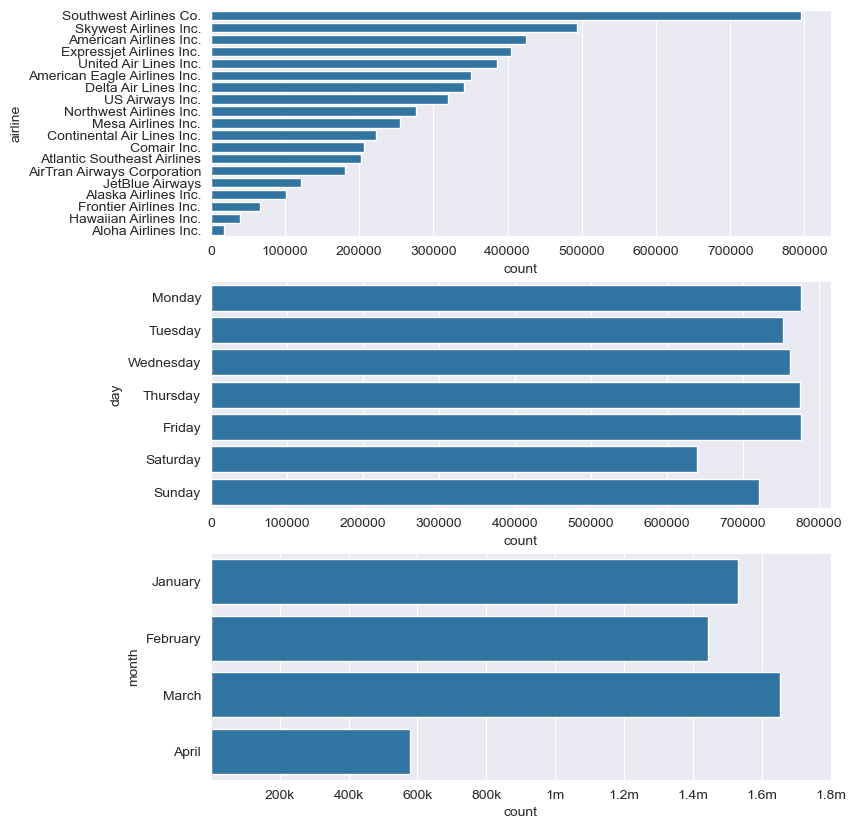

In [79]:
#let's start with the distribution of month, day and airline
fig, ax = plt.subplots(nrows=3, figsize = [8,10])

order=flight_data['airline'].value_counts().index
base_color = sb.color_palette()[0]


sb.countplot(data=flight_data, y='airline',color=base_color, order=order, ax = ax[0])
sb.countplot(data = flight_data, y = 'day', color = base_color, ax = ax[1])
sb.countplot(data = flight_data, y = 'month', color = base_color, ax = ax[2])
plt.xticks([0.2e6, 0.40e6, 0.6e6, 0.80e6, 1.00e6, 1.20e6, 1.40e6, 1.60e6, 1.80e6], 
           ['200k', '400k', '600k', '800k', '1m', '1.2m', '1.4m', '1.6m', '1.8m']);

* Southwest Airlines had the most number of flights for the period.
* Most flights were scheduled for Monday, Thursday, and Friday, with Saturday being the day with the least number of flights.
* March seem to be the busiest Month for the period.

Next, let's explore the airport, city, and year variables.

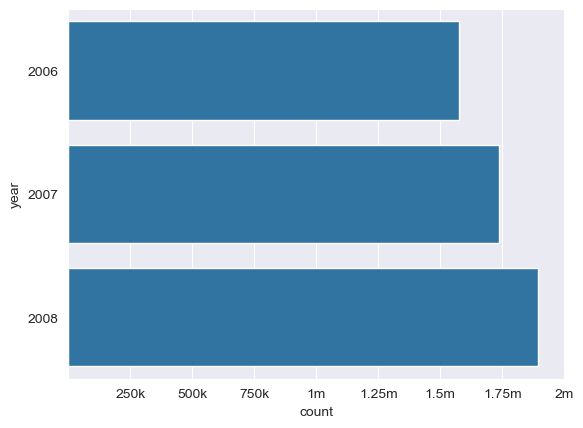

In [80]:
# Exploring the year variable

sb.countplot(data = flight_data, y = 'year', color = base_color)
plt.xticks([0.25e6, 0.50e6, 0.75e6, 1.00e6, 1.25e6, 1.50e6, 1.75e6, 2.00e6], 
           ['250k', '500k', '750k', '1m', '1.25m', '1.5m', '1.75m', '2m']);

The number of scheduled flights appear to increase with the year. 2008 had the most number of scheduled flights.

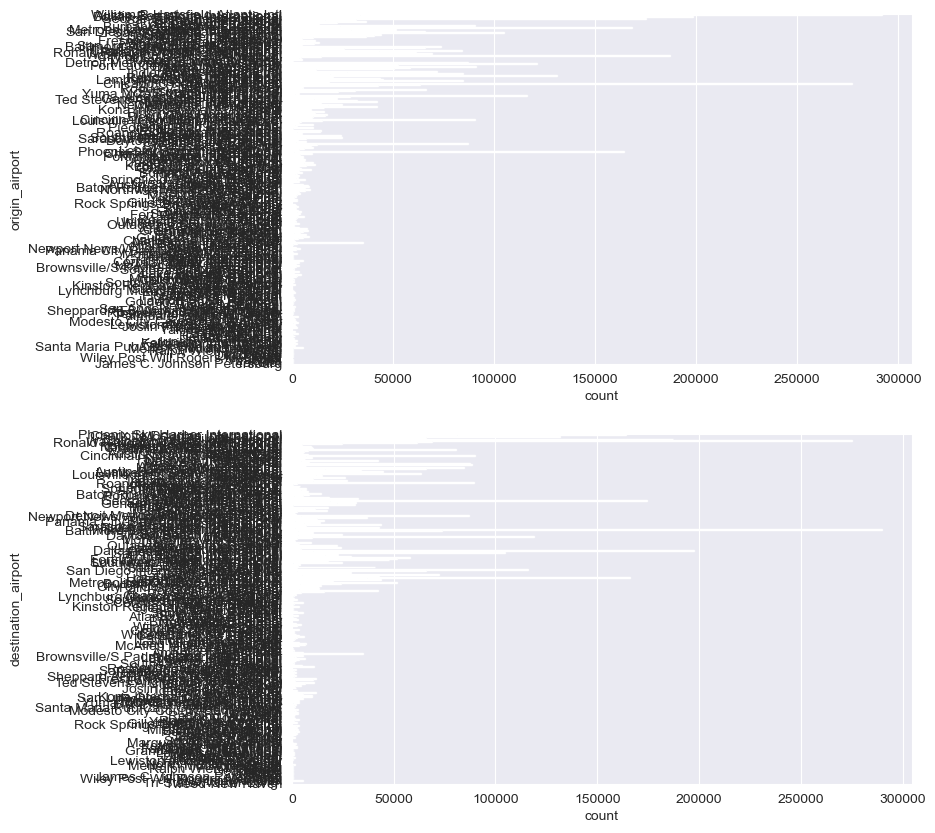

In [81]:
# Airport varibles
fig, ax = plt.subplots(nrows=2, figsize = [8,10])

sb.countplot(data = flight_data, y = 'origin_airport', color = base_color, ax=ax[0])
sb.countplot(data = flight_data, y = 'destination_airport', color = base_color, ax= ax[1]);

We have to work with the top 10 airports (origin and destination), so that we can reduce the noise or states on the plot.

In [82]:
# confirming the top 10 airports for origin and destination.
flight_data.origin_airport.value_counts()[:10],flight_data.destination_airport.value_counts()[:10]

(William B Hartsfield-Atlanta Intl    292115
 Chicago O'Hare International         277287
 Dallas-Fort Worth International      198511
 Denver Intl                          187255
 George Bush Intercontinental         175345
 Los Angeles International            168096
 Phoenix Sky Harbor International     164357
 McCarran International               131325
 Newark Intl                          121420
 Salt Lake City Intl                  116472
 Name: origin_airport, dtype: int64,
 William B Hartsfield-Atlanta Intl    290020
 Chicago O'Hare International         275291
 Dallas-Fort Worth International      197537
 Denver Intl                          187124
 George Bush Intercontinental         174640
 Los Angeles International            166163
 Phoenix Sky Harbor International     163960
 McCarran International               131535
 Newark Intl                          119149
 Salt Lake City Intl                  116194
 Name: destination_airport, dtype: int64)

The top 10 airports for both Origin and Destination flights are the same. This works well for our analysis.

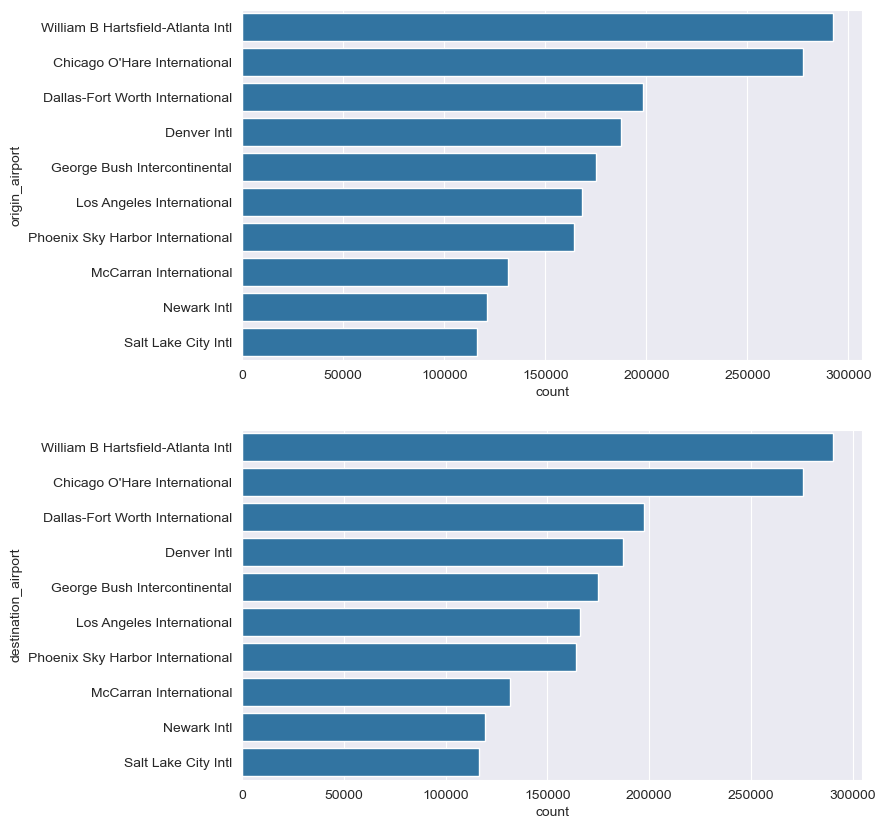

In [83]:
# explore the airport variables.
fig, ax = plt.subplots(nrows=2, figsize = [8,10])

top_airport = list(flight_data.origin_airport.value_counts()[:10].index)
sample_origin = flight_data[flight_data['origin_airport'].isin(top_airport)]
sample_destination = flight_data[flight_data['destination_airport'].isin(top_airport)]

sb.countplot(data = sample_origin, y = 'origin_airport', color = base_color, ax=ax[0], order= top_airport)
sb.countplot(data = sample_destination, y = 'destination_airport', color = base_color, ax= ax[1], order= top_airport);

The top airports (origin and destination) show almost the same number of flights. We will see how this impacts cancelled flights. One would expect that busy Airports would tend to cancel more flights than the less busy ones.

Next, we explore the DepHour variable.

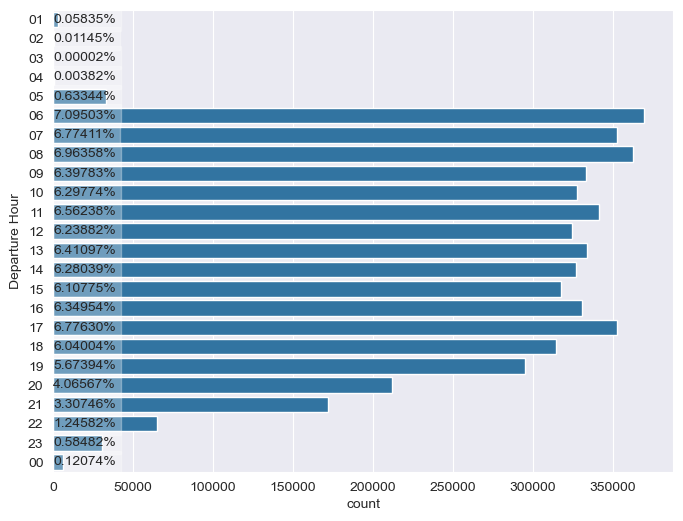

In [112]:
# exploring the Depature hour variable.
plt.figure(figsize=[8, 6])
sb.countplot(data=flight_data, y='crsdephour',color=base_color)
plt.ylabel('Departure Hour')
for i in range(flight_data.crsdephour.value_counts().shape[0]):  
    count = flight_data.crsdephour.value_counts(sort= False)[i]
    pct_string = '{:0.5f}%'.format(100*count/flight_data.shape[0])
    plt.text(count/count,i, pct_string, va='center',bbox=dict(facecolor='white', alpha=0.3));

7.1% flights were booked for 6am. More flights were generally booked in the morning. 5pm also saw a shoot in booked flights (6.78%).

3am appears to have the least number of scheduled flights.
We will how this impacts other variables as well.

Up next, we should look at Distance

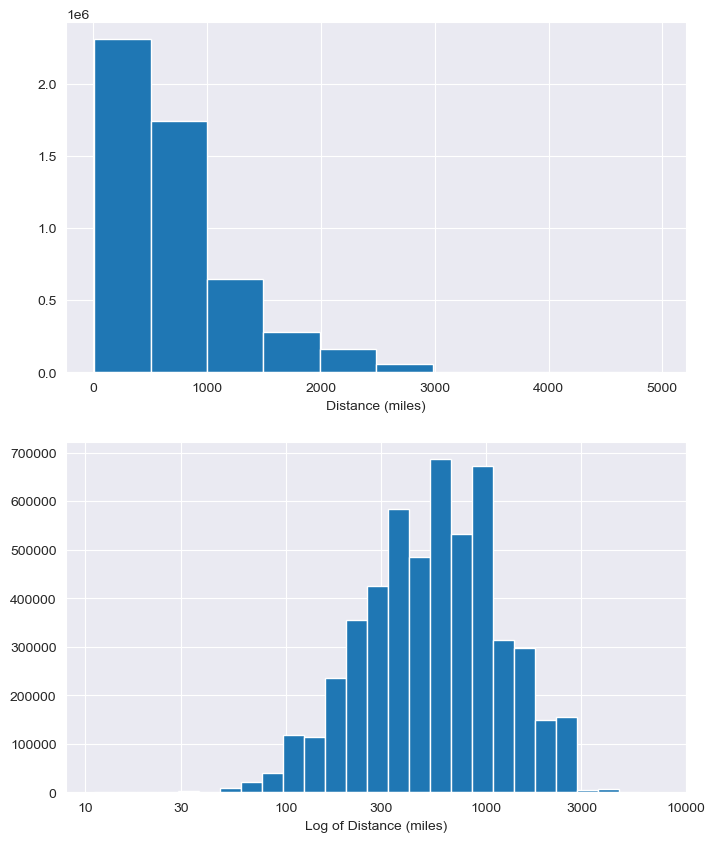

In [121]:
# exploring the distance variable
fig, ax = plt.subplots(nrows=2, figsize=[8, 10])
bin_size = 0.105
bins = 10 ** np.arange(np.log10(flight_data['distance'].min()), 
                       np.log10(flight_data['distance'].max())+bin_size, bin_size)

ax[0].hist(data=flight_data, x='distance',color=base_color)
ax[0].set_xlabel('Distance (miles)');

ax[1].hist(data=flight_data, x='distance',color=base_color, bins= bins)
ax[1].set_xscale('log')
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(i) for i in ticks]
ax[1].set_xticks(ticks,labels)
ax[1].set_xlabel('Log of Distance (miles)');

Distance is skewed to the right, with a lot of flights around 1000 miles, and few on the high end. When plotted on a log-scale, the distance distribution looks roughly unimodal, with the highest peak around 700 miles.

Next up, the cancelled flights and cancellation code.

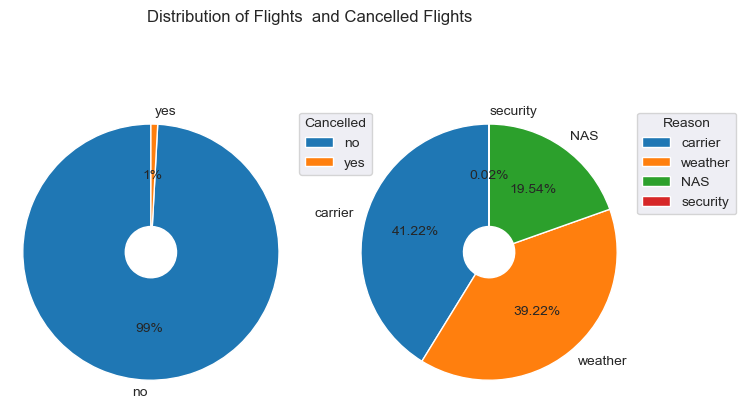

In [86]:
# we will use a pie chart for this exploration.
plt.figure(figsize = [8, 5]) 
fig.subplots_adjust(hspace=6)

plt.subplot(1, 2, 1) 
fmt = flight_data["cancelled"].value_counts()/flight_data.cancelled.value_counts().sum()
plt.pie(x=flight_data["cancelled"].value_counts(), 
        labels=flight_data["cancelled"].value_counts().index, startangle=90,
       autopct='%.f%%',wedgeprops = {'width' : 0.8});
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left',title="Cancelled");
plt.axis('square')
#plt.title('Flights');

plt.subplot(1, 2, 2) 
cancelled_flights = flight_data[flight_data.cancellationcode != 'None']
count = cancelled_flights.cancellationcode.value_counts()
fmt = count/count.sum()
plt.pie(x=cancelled_flights.cancellationcode.value_counts(), 
        labels=count.index, startangle=90,
       autopct='%.2f%%',wedgeprops = {'width' : 0.8});
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left',title="Reason");
plt.axis('square')
#plt.title('Cancellation Reason');
plt.suptitle('Distribution of Flights  and Cancelled Flights');


This implies that 1% of flights were cancelled, and majority (41.22%) of the cancelled flights can be attributed to Airlines (Carriers) and then Weather and so on... 

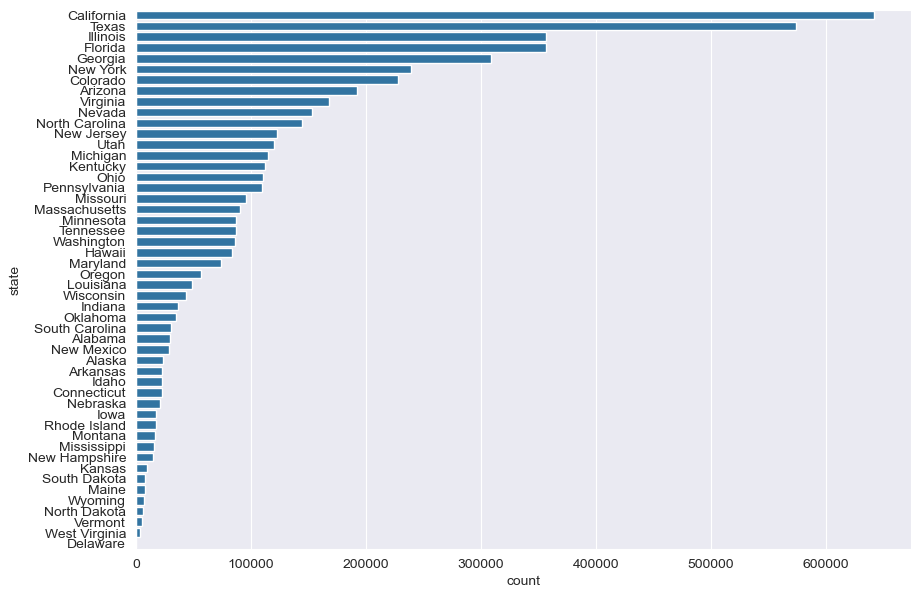

In [87]:
# let's look at state.
plt.figure(figsize=[10,7])
count = flight_data.state.value_counts().index
sb.countplot(data= flight_data, y='state', color= base_color, order= count);

In [88]:
# Lets look at the busiest states in terms of scheduled flights (more than 100,000 scheduled flights).
state_count = flight_data.state.value_counts()
idx = np.sum(state_count > 100000)
state_order = state_count.index[:idx]

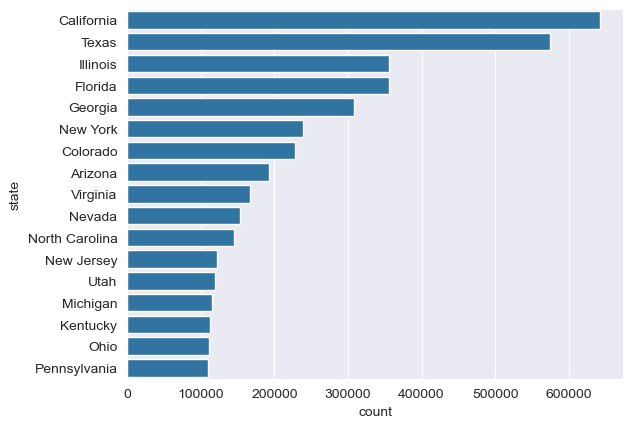

In [89]:
sb.countplot(data= flight_data, y='state', order= state_order, color= base_color);

* California is the busiest State for the period, followed by Texas and Illinois.
* We will see how state relates with other variables (distance and cancelled flight).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distance variable had a lot of values at the lower end (0 - 1000 miles), so I did a log-transformation to get better insight. With the transformation, distance appeared to be roughly unimodal, with the highest peak around 700 miles..

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the airports variable, a lot of airports were plotted. I adjusted the plot to reflect only the top 10 airports for both Origin and Departure. Also, for the cancelled flights, I filtered the entire data to just the flights that were cancelled.

## Bivariate Exploration

To start off with, I want to look at the relationship among features in the data. We will attempt to address the questions below:

* Which airport has the most cancelled flights?
* What are the distribution of cancelled flights by year, month and day?
* What month is the best for flights?
* Which airline has the maximum proportion of cancelled flights and what are the reasons of cancellation?
* Any relationship between Cancelled Flights and Distance?
* What about Airlines and Distance?
* What about State & Distance; State & Cancelled Flights; State and Airlines?
* What about Departure hour and Day?


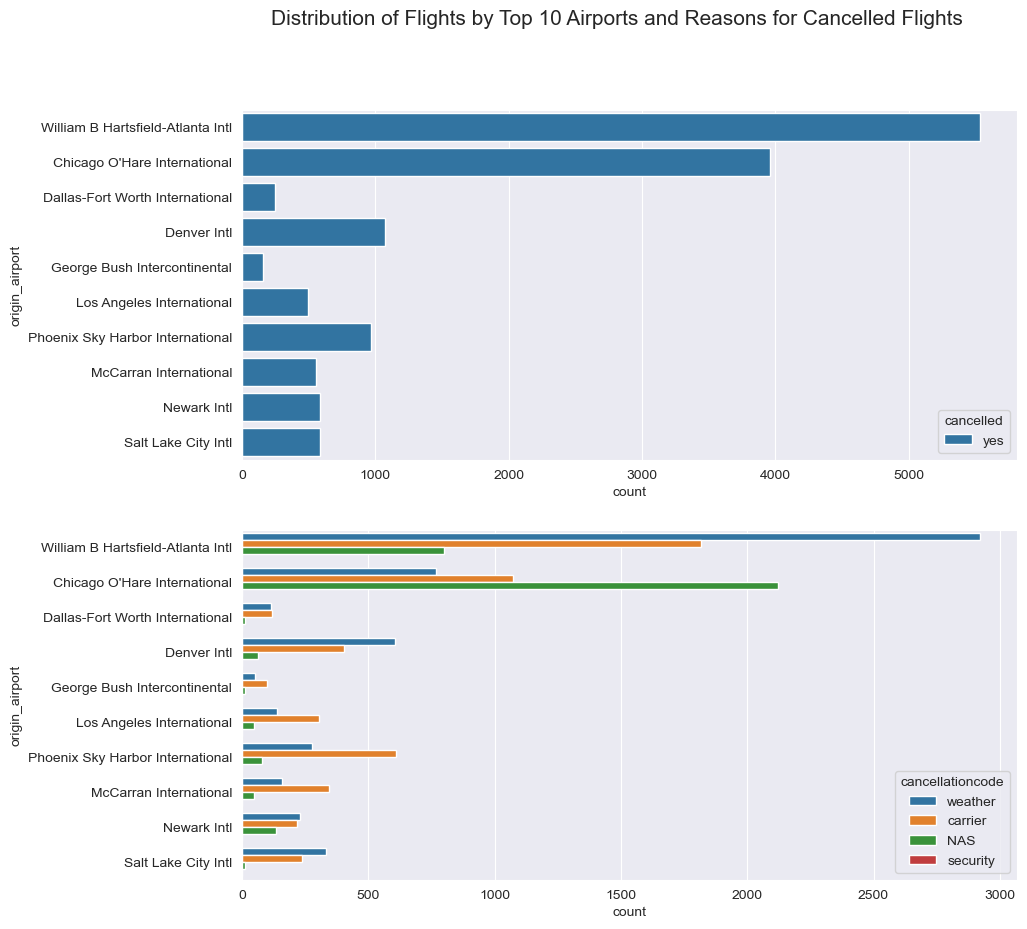

In [90]:
# What is the relationship between airports and cancelled flights?
fig, ax = plt.subplots( 2, figsize=(10, 10))

sb.countplot(data = cancelled_flights, y = 'origin_airport', hue= 'cancelled' , order= top_airport, ax= ax[0]);

sb.countplot(data = cancelled_flights, y = 'origin_airport', hue= 'cancellationcode' , order= top_airport, ax= ax[1]);
fig.suptitle('Distribution of Flights by Top 10 Airports and Reasons for Cancelled Flights', size=15);

* Although, William B Intl Airport recorded the most cancelled flights for the top 10 Airports, the reason were majorly due to Weather and not Carrier.
* George Bush Airport, although, the 5th busiest airport, recorded the least cancelled flights for the top 10 Airports.
* William Intl. Airport recorded the worst  cancelled flights due to Airlines.
* We will look into this relationship more.

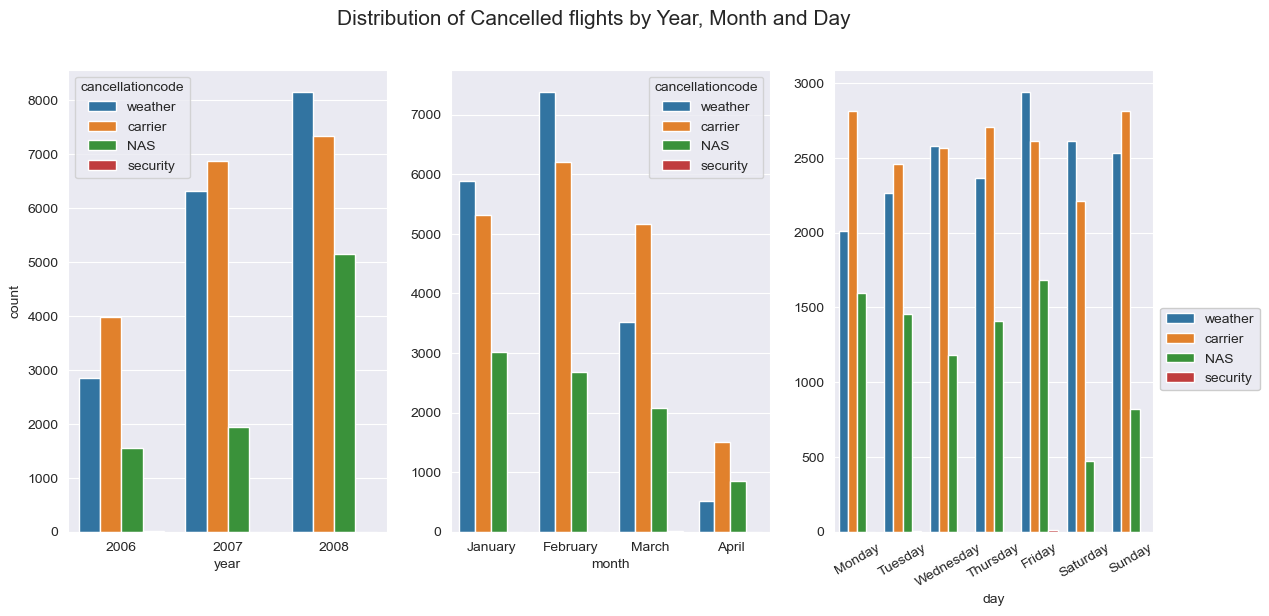

In [118]:
# What are the distribution of cancelled flights by year, month and day?
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

sb.countplot(data=cancelled_flights, x='year', hue='cancellationcode', ax=ax[0])

sb.countplot(data=cancelled_flights, x='month', hue='cancellationcode', ax=ax[1])
ax[1].set_ylabel("")

sb.countplot(data=cancelled_flights, x='day', hue='cancellationcode', ax=ax[2])
ax[2].tick_params(axis='x',rotation=30)
ax[2].legend(bbox_to_anchor=(1,0.5),framealpha=1)
ax[2].set_ylabel("");
fig.suptitle('Distribution of Cancelled flights by Year, Month and Day', size=15);

* Cancelled Flights tend to increase with the year.
* April recorded the least number of Cancelled flights.
* Saturday appears to be the best Flight Day, as it recorded the least cancelled flights due to Carrier.

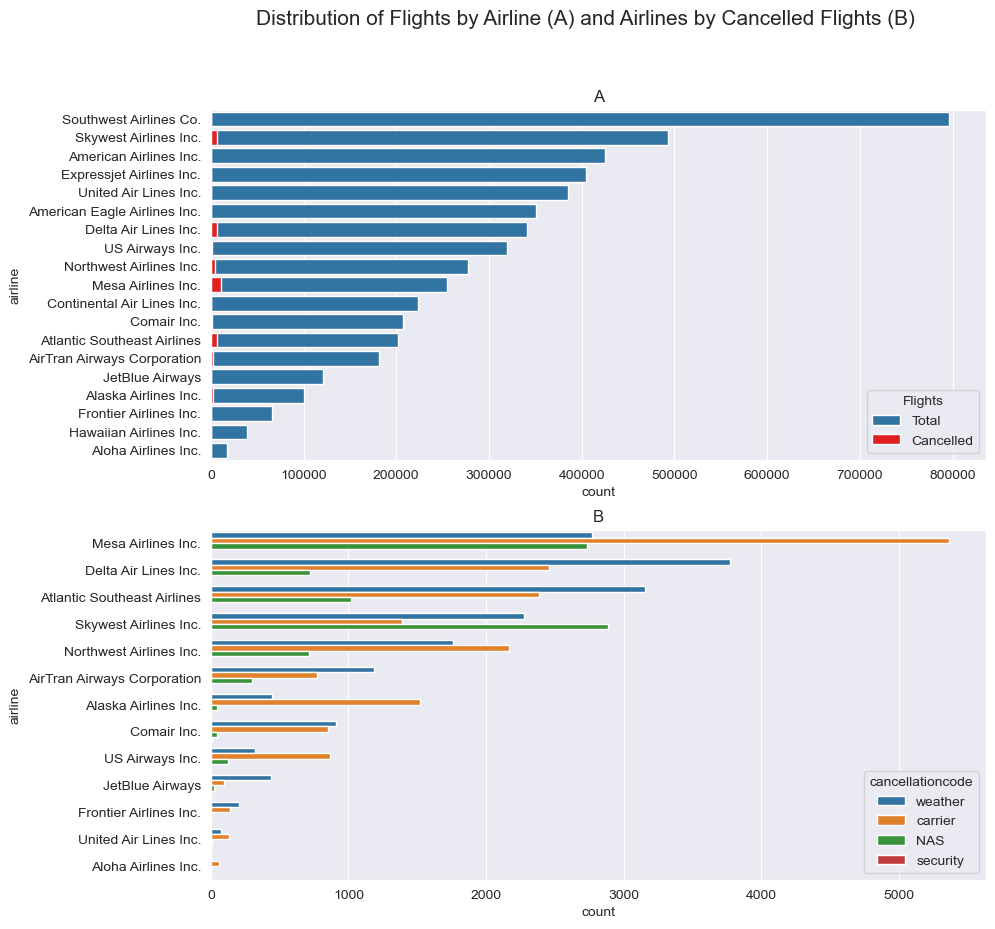

In [92]:
# Which airline has the maximum proportion of cancelled flights and what are the reasons of cancellation?
fig, ax = plt.subplots( 2, figsize=(10, 10))
order_airline = cancelled_flights.airline.value_counts().index
order_airline_2 =flight_data.airline.value_counts().index

sb.countplot(data = flight_data, y = 'airline', order= order_airline_2, label='Total', ax= ax[0], color=base_color)
sb.countplot(data = cancelled_flights, y = 'airline', order= order_airline_2, label='Cancelled' , ax= ax[0], color='red');
ax[0].set_title('A')
ax[0].legend(title="Flights");

sb.countplot(data = cancelled_flights, y = 'airline', hue= 'cancellationcode', order= order_airline , ax= ax[1]);
ax[1].set_title('B');
fig.suptitle('Distribution of Flights by Airline (A) and Airlines by Cancelled Flights (B)', size=15);

* This really demonstrates that some airlines (Southwest >  American Airways > Expressjet Airlines > American Eagle > Continental Air) have 100% record of flight completion. 
* Others show high number of cancelled flights due to the Airlines themselves. For example, Mesa Airlines> Delta Air> Atlantic Southeast.
> Up next, any relationship betweeen Distance and Cancelled Flights?

In [93]:
#  compute the logarithm of distance to make plotting easier.
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

flight_data['log_distance'] = flight_data['distance'].apply(log_trans)
cancelled_flights['log_distance'] = cancelled_flights['distance'].apply(log_trans)

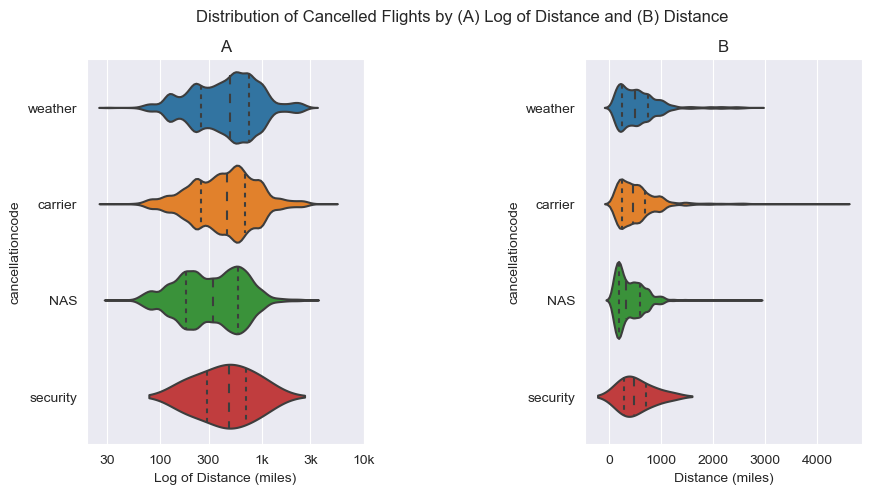

In [94]:
# Any relationship between Cancelled Flights and Distance?
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.8)

sb.violinplot(data=cancelled_flights, y='cancellationcode', x='log_distance', inner='quartile', ax= ax[0]);
ax[0].set_title('A')
ax[0].set_xticks(log_trans(np.array([30, 100, 300, 1e3, 3e3, 1e4])))
ax[0].set_xticklabels(['30', '100', '300', '1k', '3k', '10k'])
ax[0].set_xlabel('Log of Distance (miles)');


sb.violinplot(data=cancelled_flights, y='cancellationcode', x='distance', inner='quartile', ax= ax[1]);
ax[1].set_title('B');
ax[1].set_xlabel('Distance (miles)');
plt.suptitle('Distribution of Cancelled Flights by (A) Log of Distance and (B) Distance');

* Majority of the flights are within 200 - 800 miles.
* Weather appears to impact more flights. Although, it shares almost the same median as carrier.
* Cancelled Flights due to security reasons, appear to be normally distributed.

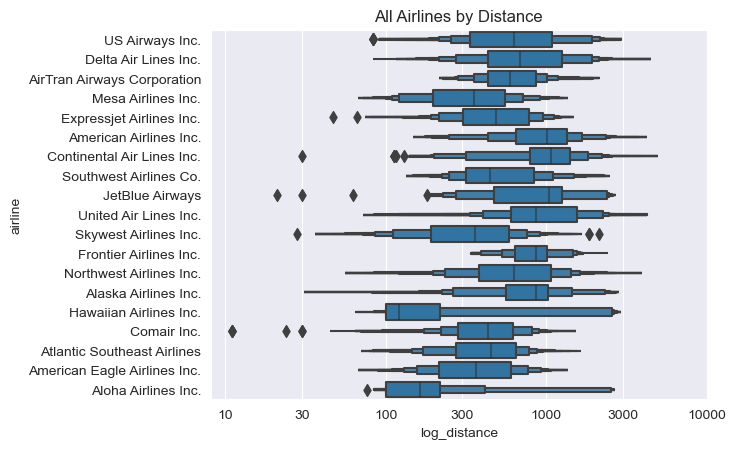

In [95]:
# What about Airlines and Distance?

sb.boxenplot(data = flight_data, y= 'airline', x= 'log_distance', color= base_color)
plt.xticks(log_trans(np.array(ticks)), labels);
plt.title('All Airlines by Distance');


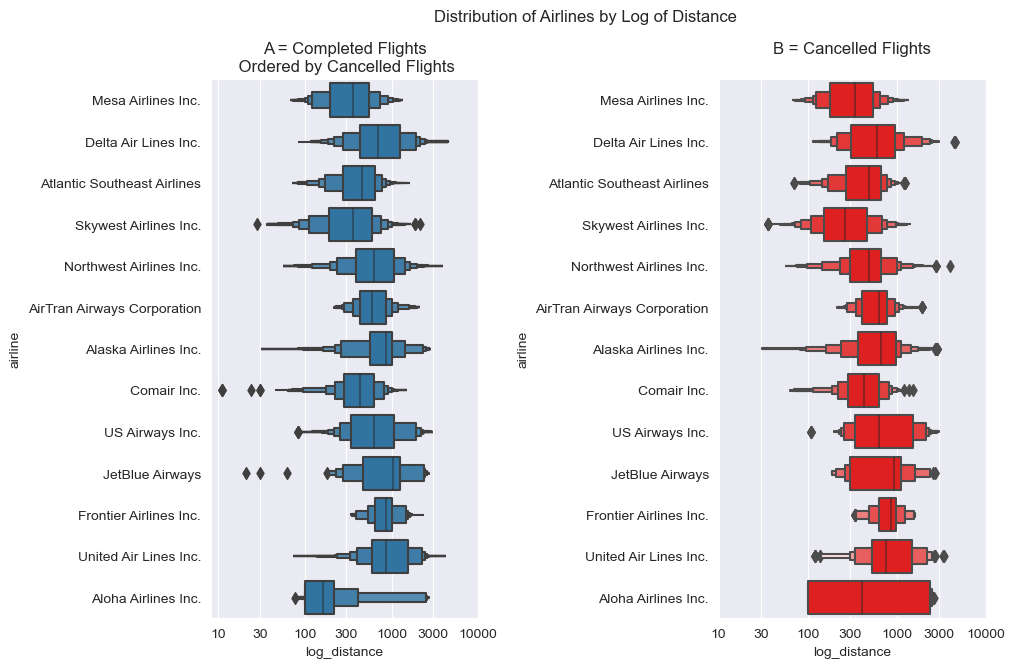

In [96]:
# Completed Flights and Cancelled Flights by Distance?
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
fig.subplots_adjust(wspace=0.9)

completed_flights = flight_data[flight_data.cancellationcode == 'None']

sb.boxenplot(data = completed_flights, y= 'airline', x= 'log_distance', color= base_color, ax= ax[0], order= order_airline)
ax[0].set_xticks(log_trans(np.array(ticks)), labels);
ax[0].set_title('A = Completed Flights\n Ordered by Cancelled Flights');

sb.boxenplot(data = cancelled_flights, y= 'airline', x= 'log_distance', color= 'red', ax= ax[1], order= order_airline)
ax[1].set_xticks(log_trans(np.array(ticks)), labels);
ax[1].set_title('B = Cancelled Flights\n');

plt.suptitle('Distribution of Airlines by Log of Distance');

* It is noticeable that 100% of Cancelled flights by each airline falls within the 200-700 miles.
* For some Airlines, Cancelled Flights tend to have a slightly higher distance compared with Completed Flights. This is very noticeable for **Aloha Airlines Inc**. It also has more cancelled flights than completed flights.
* This implies that longer flights tend to be cancelled more.

> What about State & Distance; State & Cancelled Flights; State and Airlines?

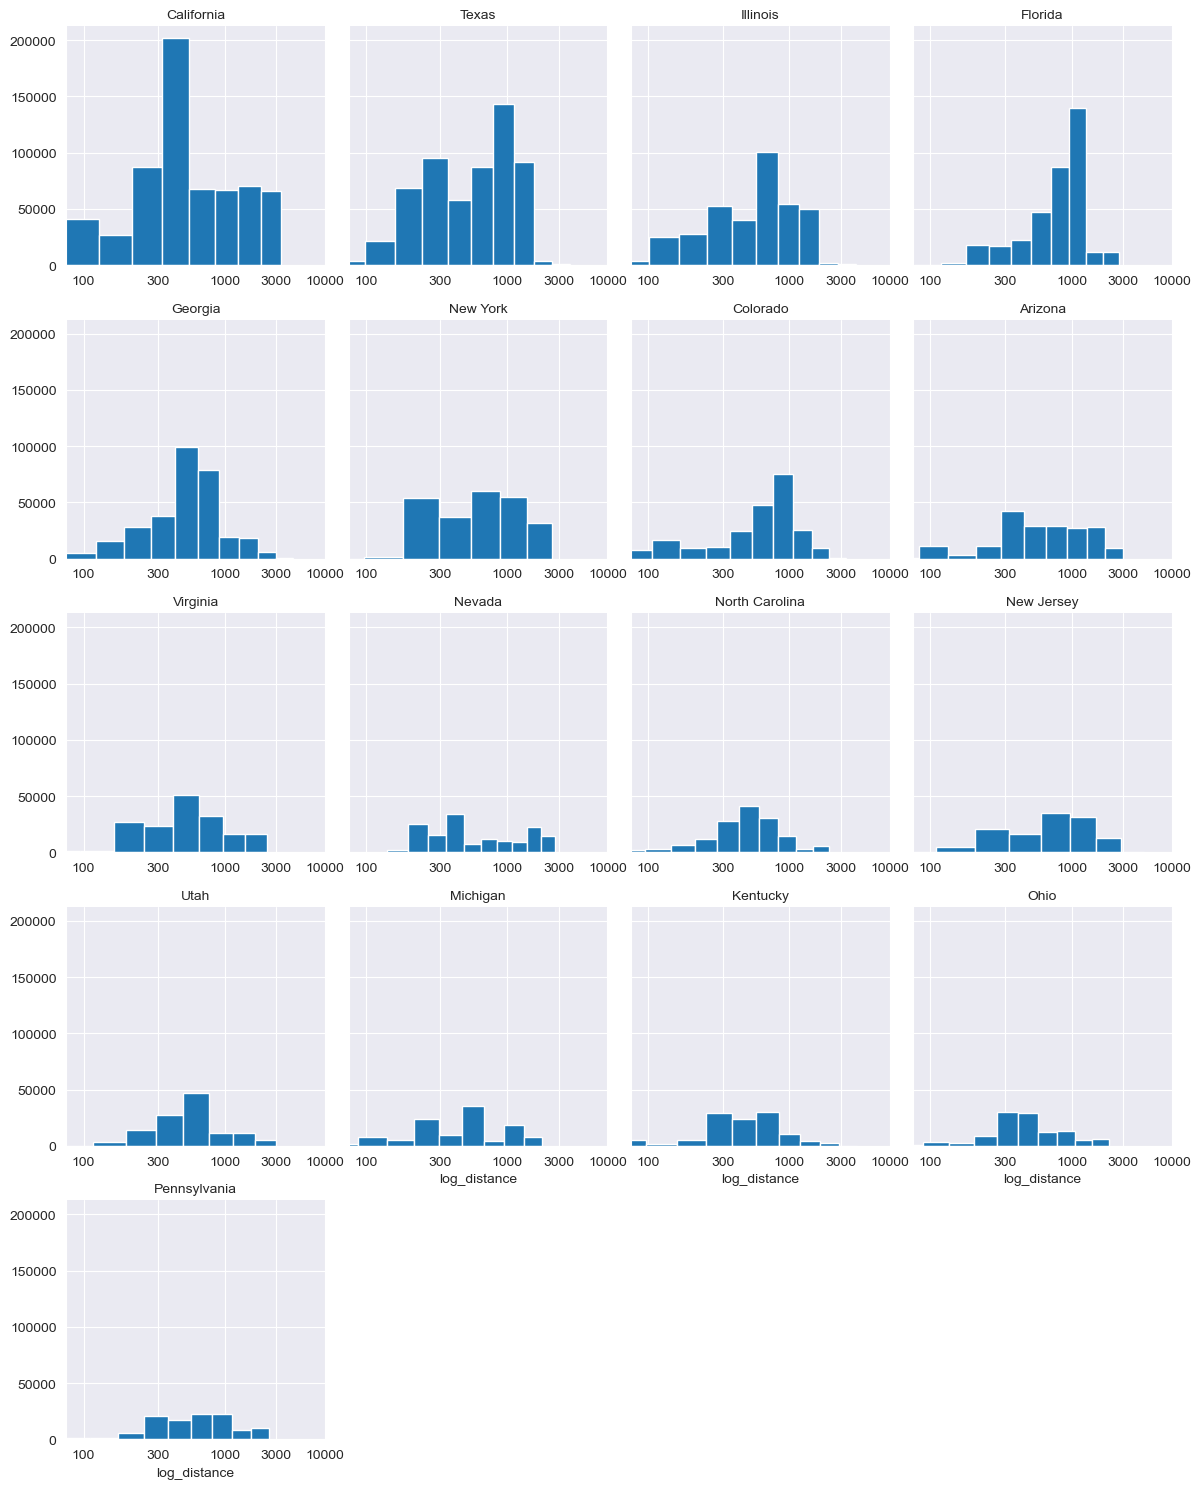

In [97]:
# Busiest States and Log_distance.

g = sb.FacetGrid(data = flight_data, col = 'state', col_wrap = 4,
                  col_order = state_order, sharex= False)

g.map(plt.hist, 'log_distance').set(xscale= 'log');
g.set_titles('{col_name}')
g.set(xticks= log_trans(np.array(ticks)), xticklabels= labels)
g.set(xlim = log_trans(np.array(80)));

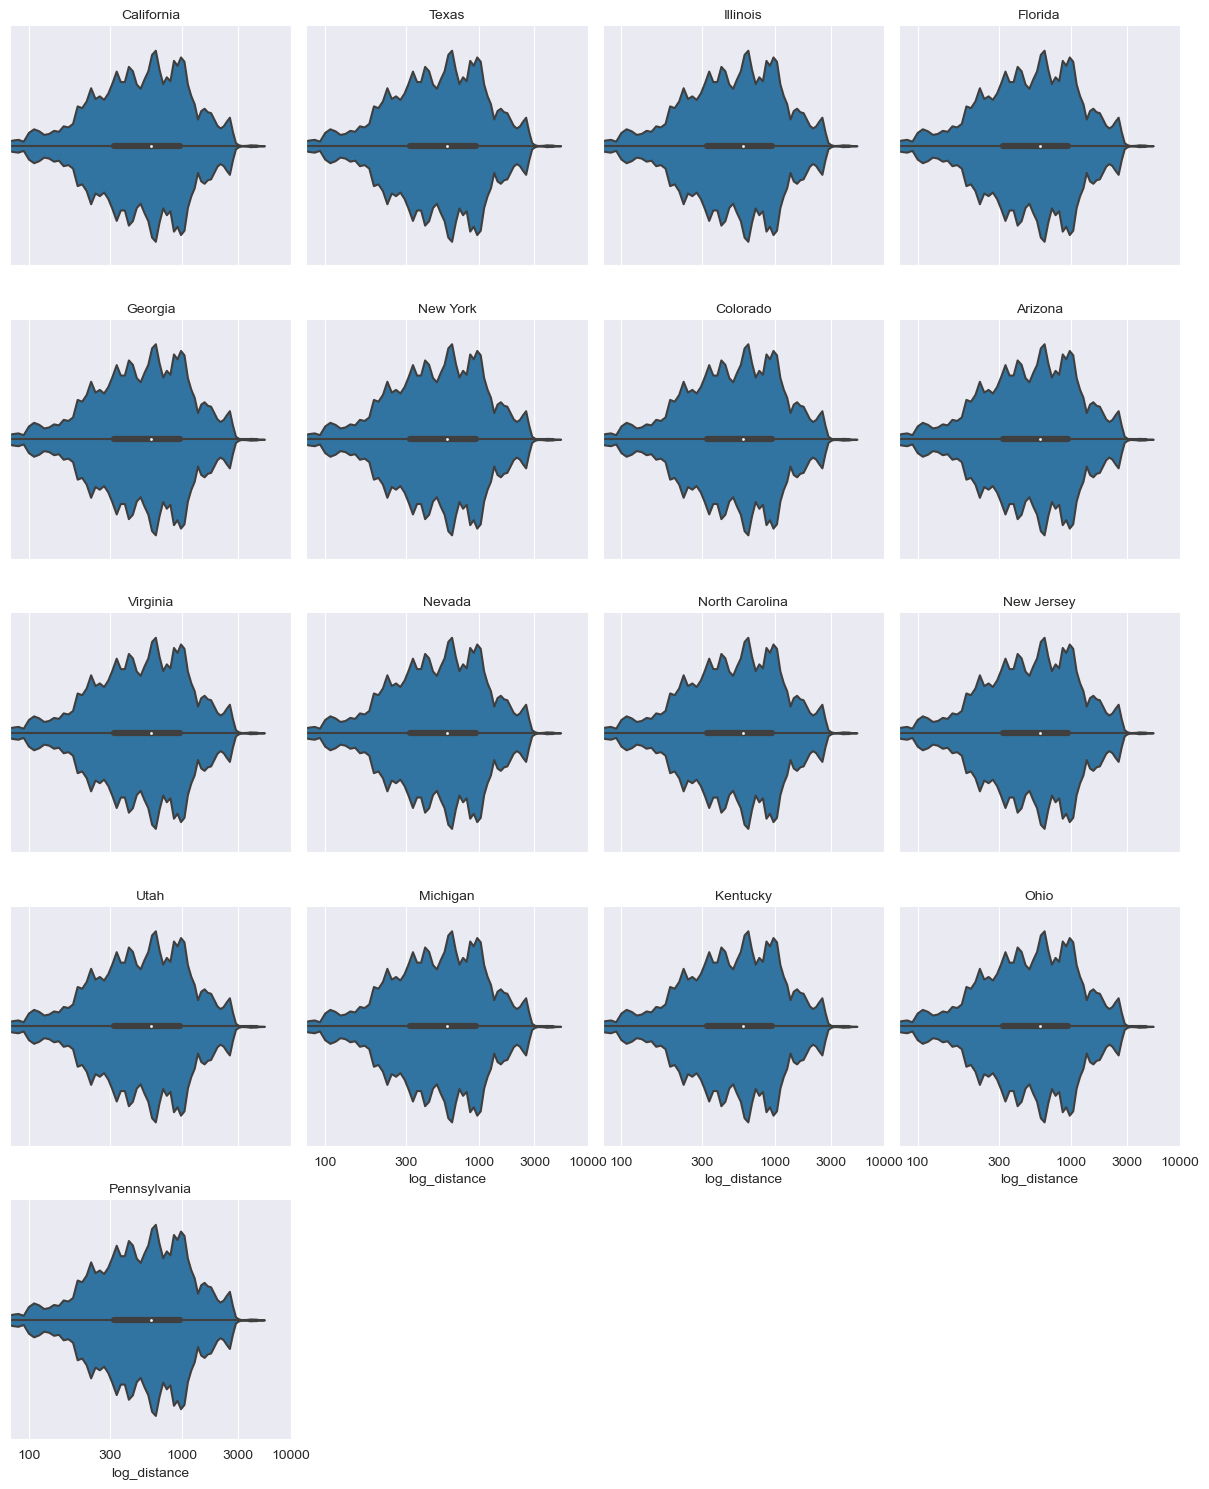

In [98]:
# Busiest States and Log_distance using a Violinplot.
g = sb.FacetGrid(data = flight_data, col = 'state', col_wrap = 4,
                  col_order = state_order)

g.map(sb.violinplot, data= flight_data, x='log_distance').set(xscale= 'log');
g.set_titles('{col_name}')
g.set(xticks= log_trans(np.array(ticks)), xticklabels= labels)
g.set(xlim = log_trans(np.array(80)));

* Flight scheduled for the busiest states show the same distribution; Most of the flights range from 300 - 1000 miles. 
* However, some states experience more scheduled flights than others. This is evident from the Histogram.

> Let's look at the relationship between Busiest State & Cancelled Flights.

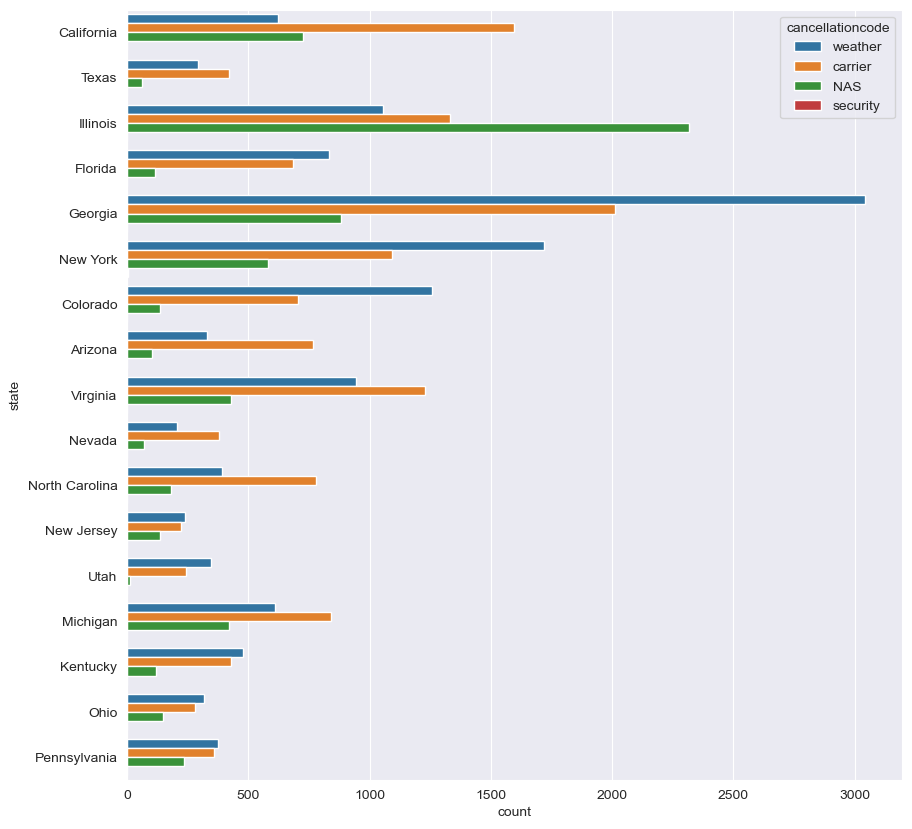

In [99]:
# State & Cancelled Flights...
plt.figure(figsize=[10,10])
sb.countplot(data=cancelled_flights, hue='cancellationcode', y='state', order= state_order);

* Georgia appears to be the worst state for travels; At just over 300,000 scheduled flights, it recorded over 2,000 flights cancelled due to Airlines.
* Texas and New Jersey are quite safe for flights, as they experienced the least cancelled flights compared with scheduled flights.

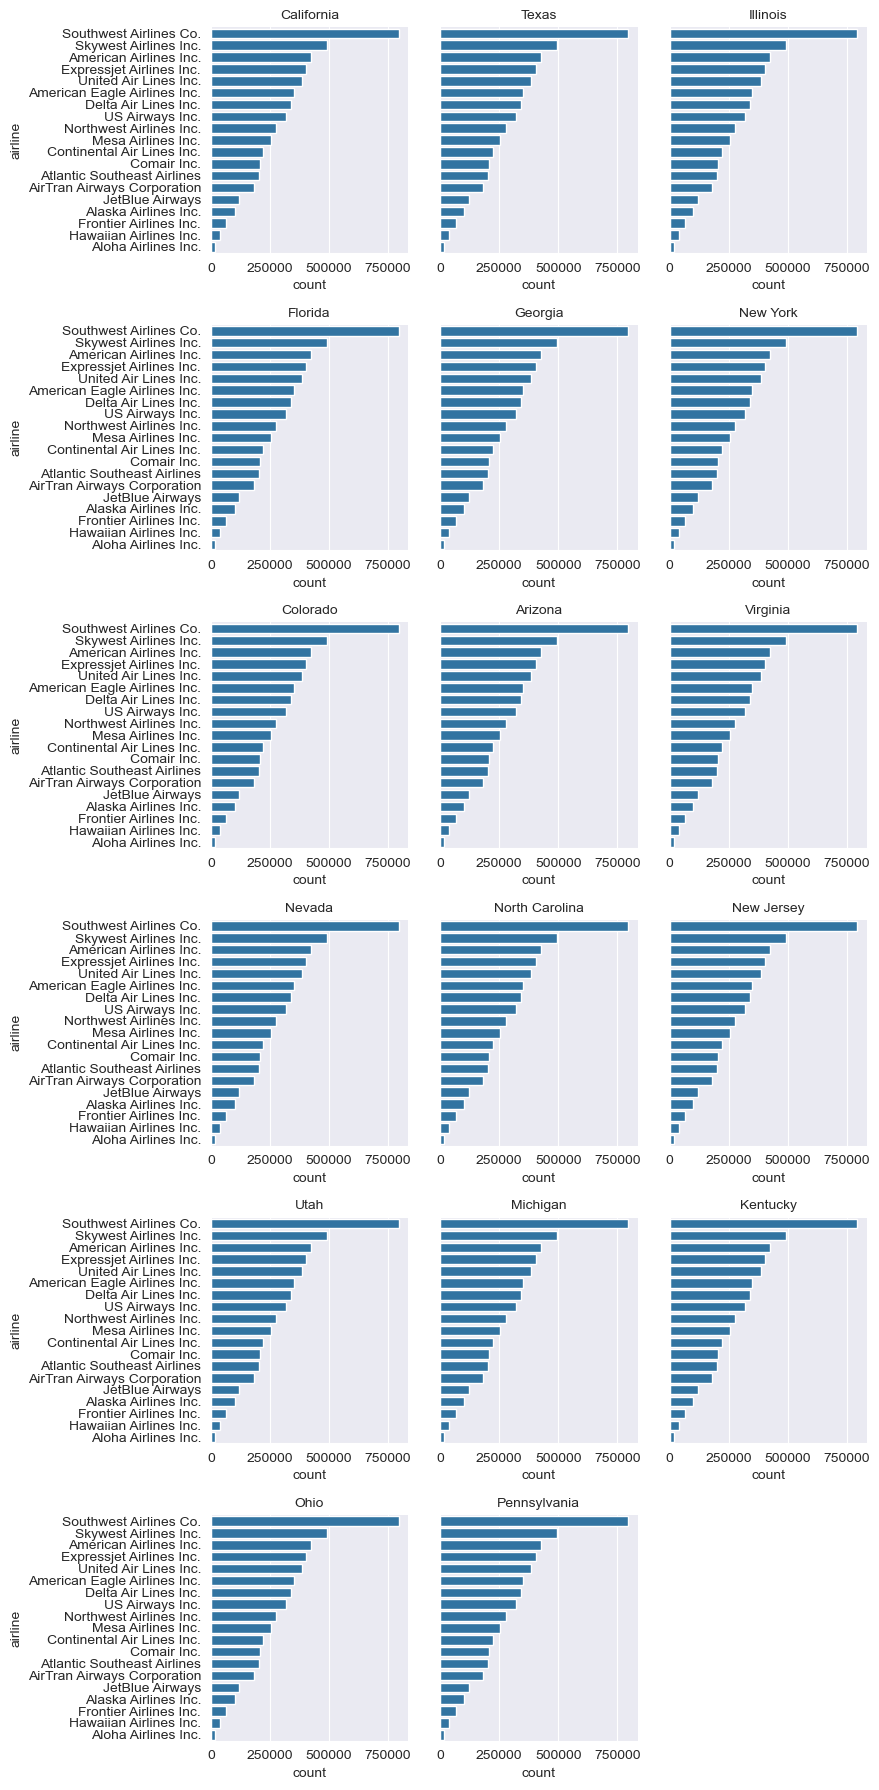

In [100]:
# Let's explore States and Top Airlines
g = sb.FacetGrid(data = flight_data, col = 'state', col_wrap = 3,
                  col_order = state_order, sharex= False)
g.map(sb.countplot, data= flight_data, y='airline', order= order_airline_2)
g.set_titles('{col_name}');

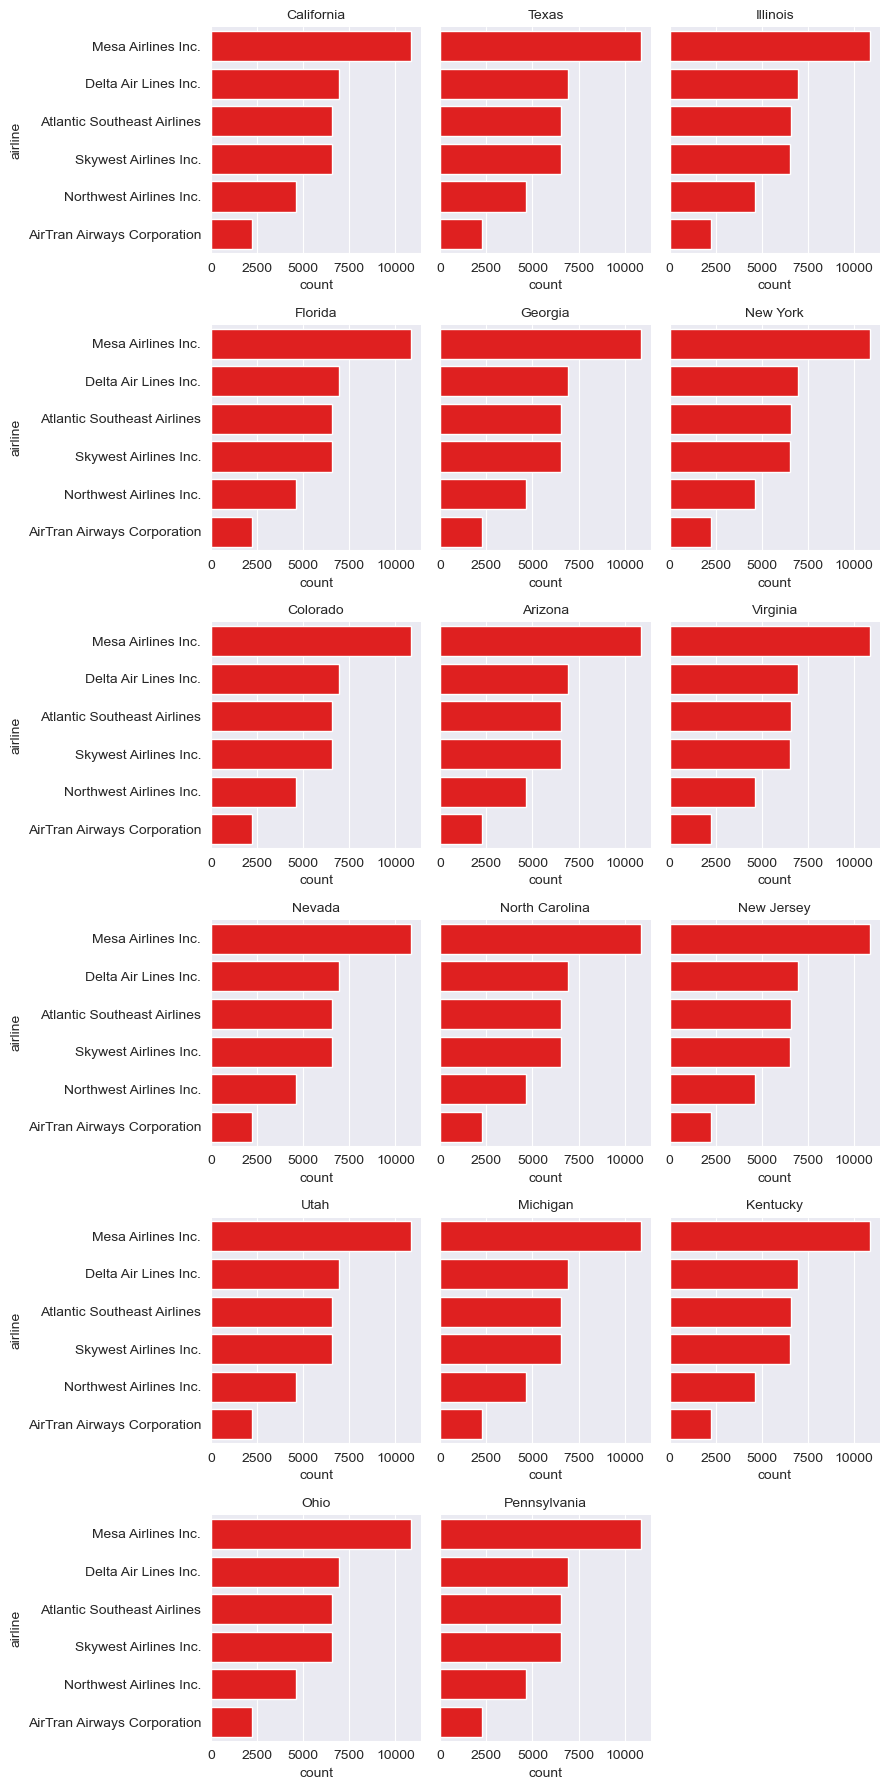

In [101]:
# States and Top 6 Airlines with cancelled flights
g = sb.FacetGrid(data = cancelled_flights, col = 'state', col_wrap = 3,
                  col_order = state_order, sharex= False)
g.map(sb.countplot, data= cancelled_flights, y='airline', order= order_airline[:6], color='red')
g.set_titles('{col_name}');

* Mesa Airlines is not in the top 6 for scheduled flights, but ranks as the worst for cancelled flight across the Busiest states.


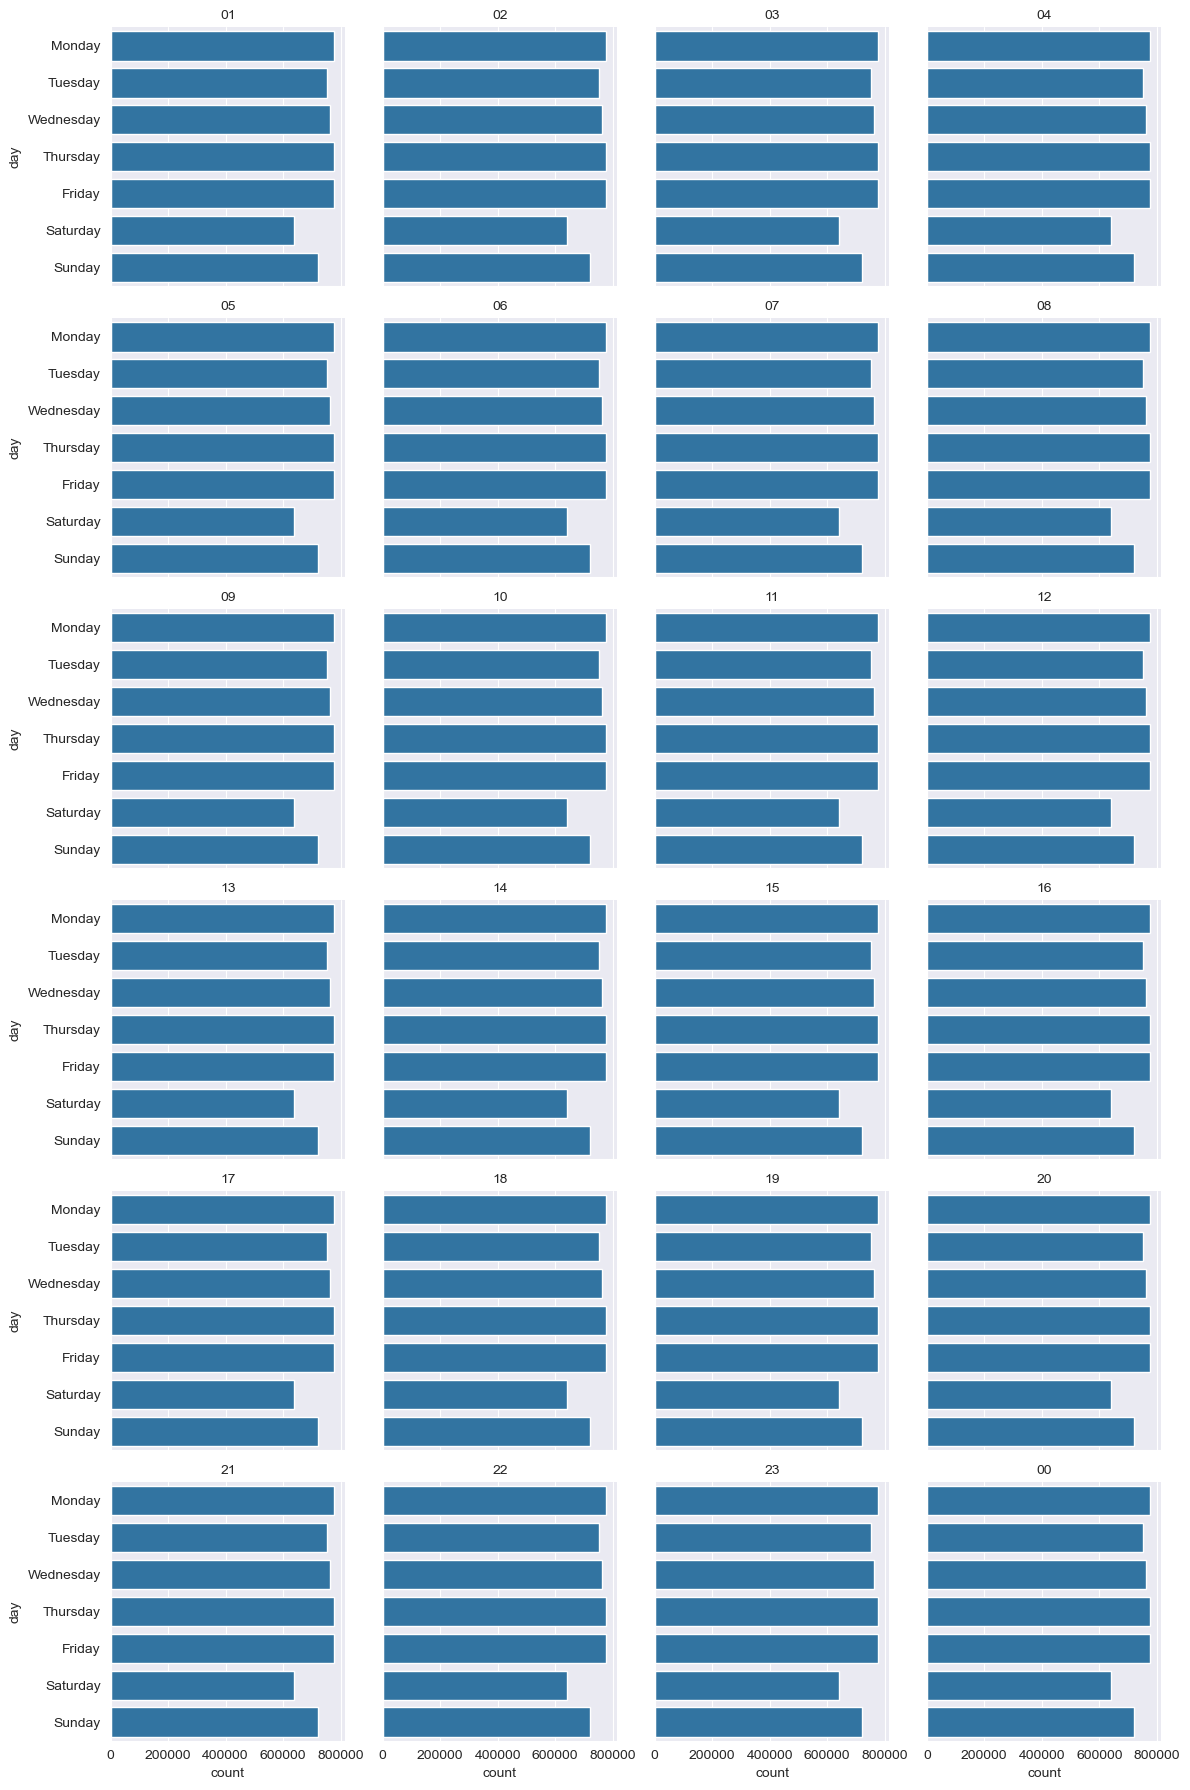

In [102]:
# What about Departure hour and Day?

g = sb.FacetGrid(data=flight_data, col= 'crsdephour', col_wrap= 4 )
g.map(sb.countplot, data=flight_data, y='day')
g.set_titles('{col_name}');

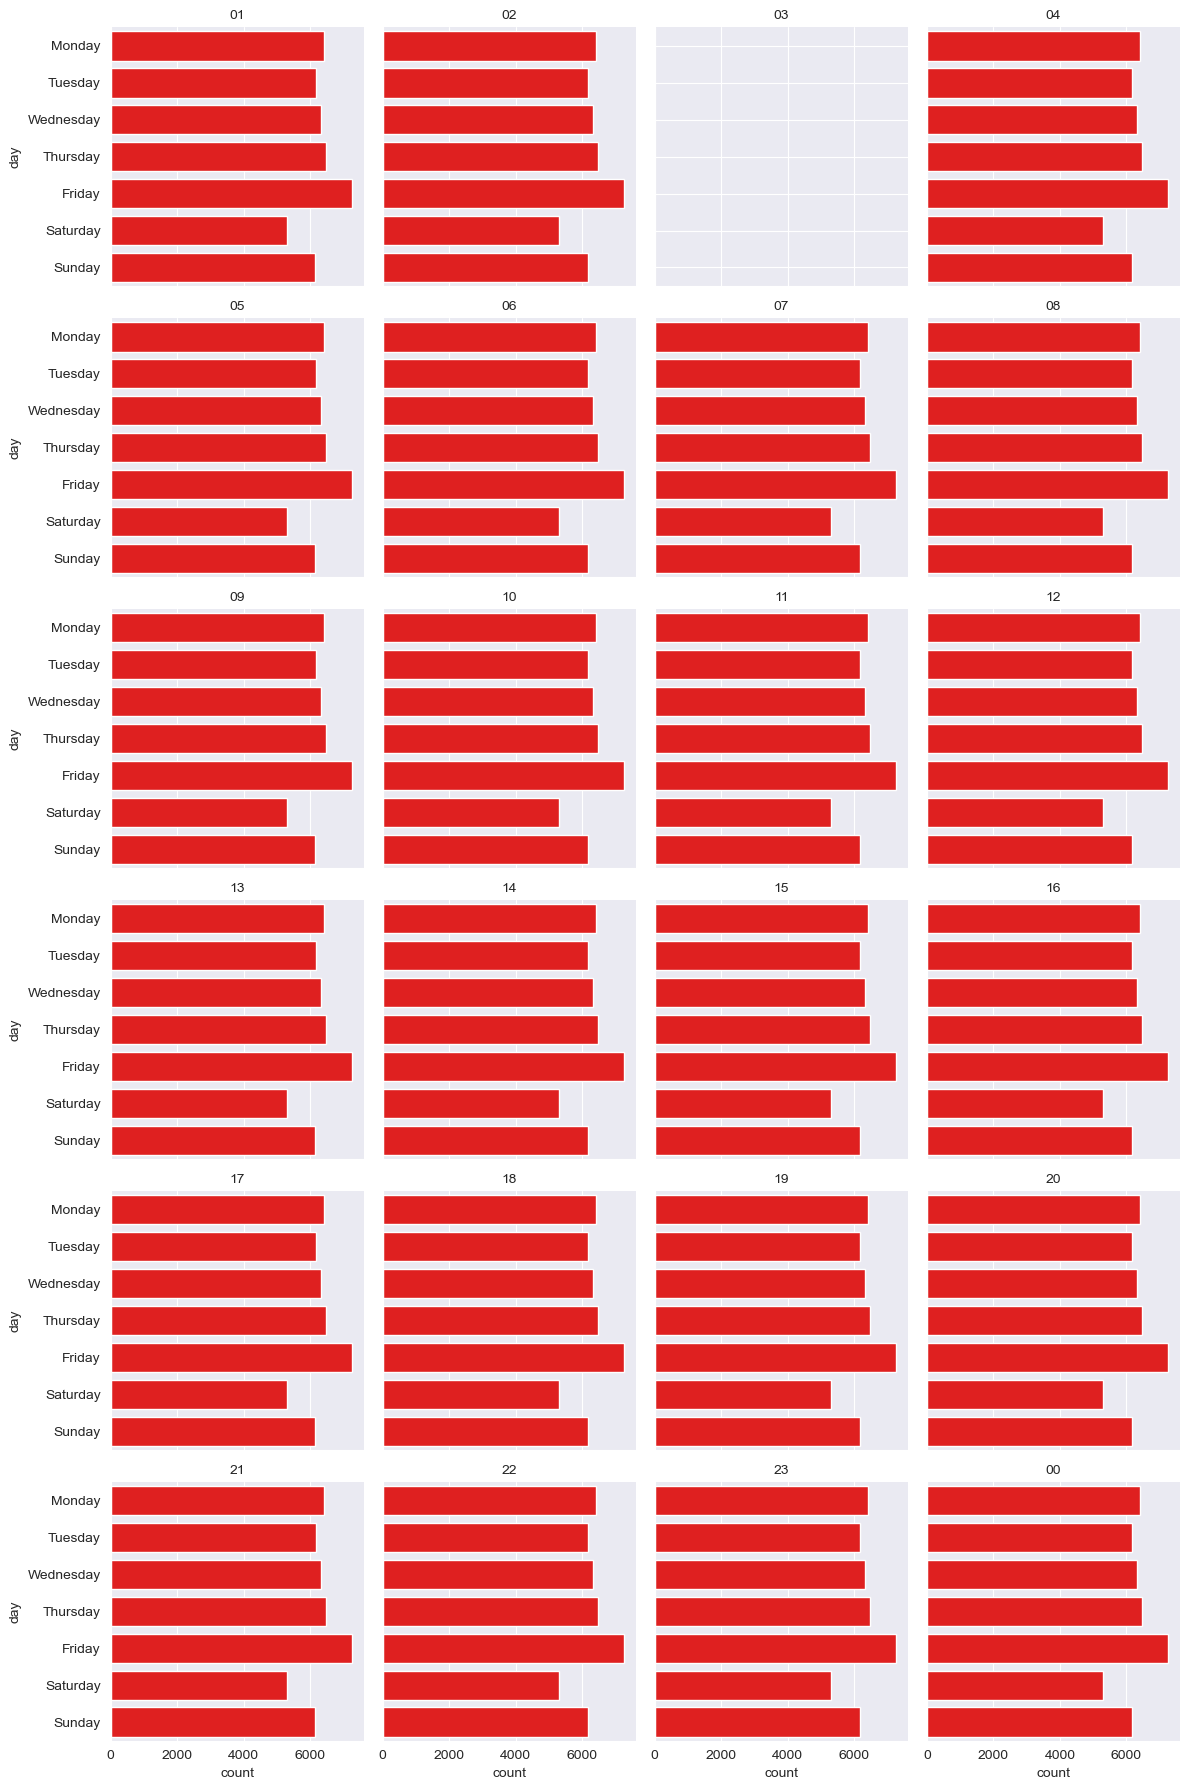

In [103]:
# What about Departure hour and Day in terms of cancelled flights?

g = sb.FacetGrid(data=cancelled_flights, col= 'crsdephour', col_wrap= 4 )
g.map(sb.countplot, data=cancelled_flights, y='day', color='red')
g.set_titles('{col_name}');

* Interestingly, all flights scheduled around 3am - 3:59am were completed.
* Saturday had the least cancelled flights for any Departure hour.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* As hypothesized, the busiest airports, airlines and States should cancel more flights. However, some airlines, e.g Southwest Airlines didn't follow this pattern (it had 100% complete ratio for flights booked). 
* Texas, the second busiest state had best cancelled-to-scheduled flights ratio.
* Generally, cancelled flights due to Airlines (Carriers) was observed to increase across states with increase in the number of booked flights.
* Mesa Airlines, the 10th busiest ariline is the worst Airline due to Carrier delay.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Booked Flights are normally distributed across the states, when compared to the log of Distance. 
* Majority of the flights fall within 200 - 700 miles.
* Flights scheduled for 3am-3:59am were observed to be completed for any day.

## Multivariate Exploration



>What are the preferred times or days for flights to occur?

>Are there any perfect period for the worst airline?

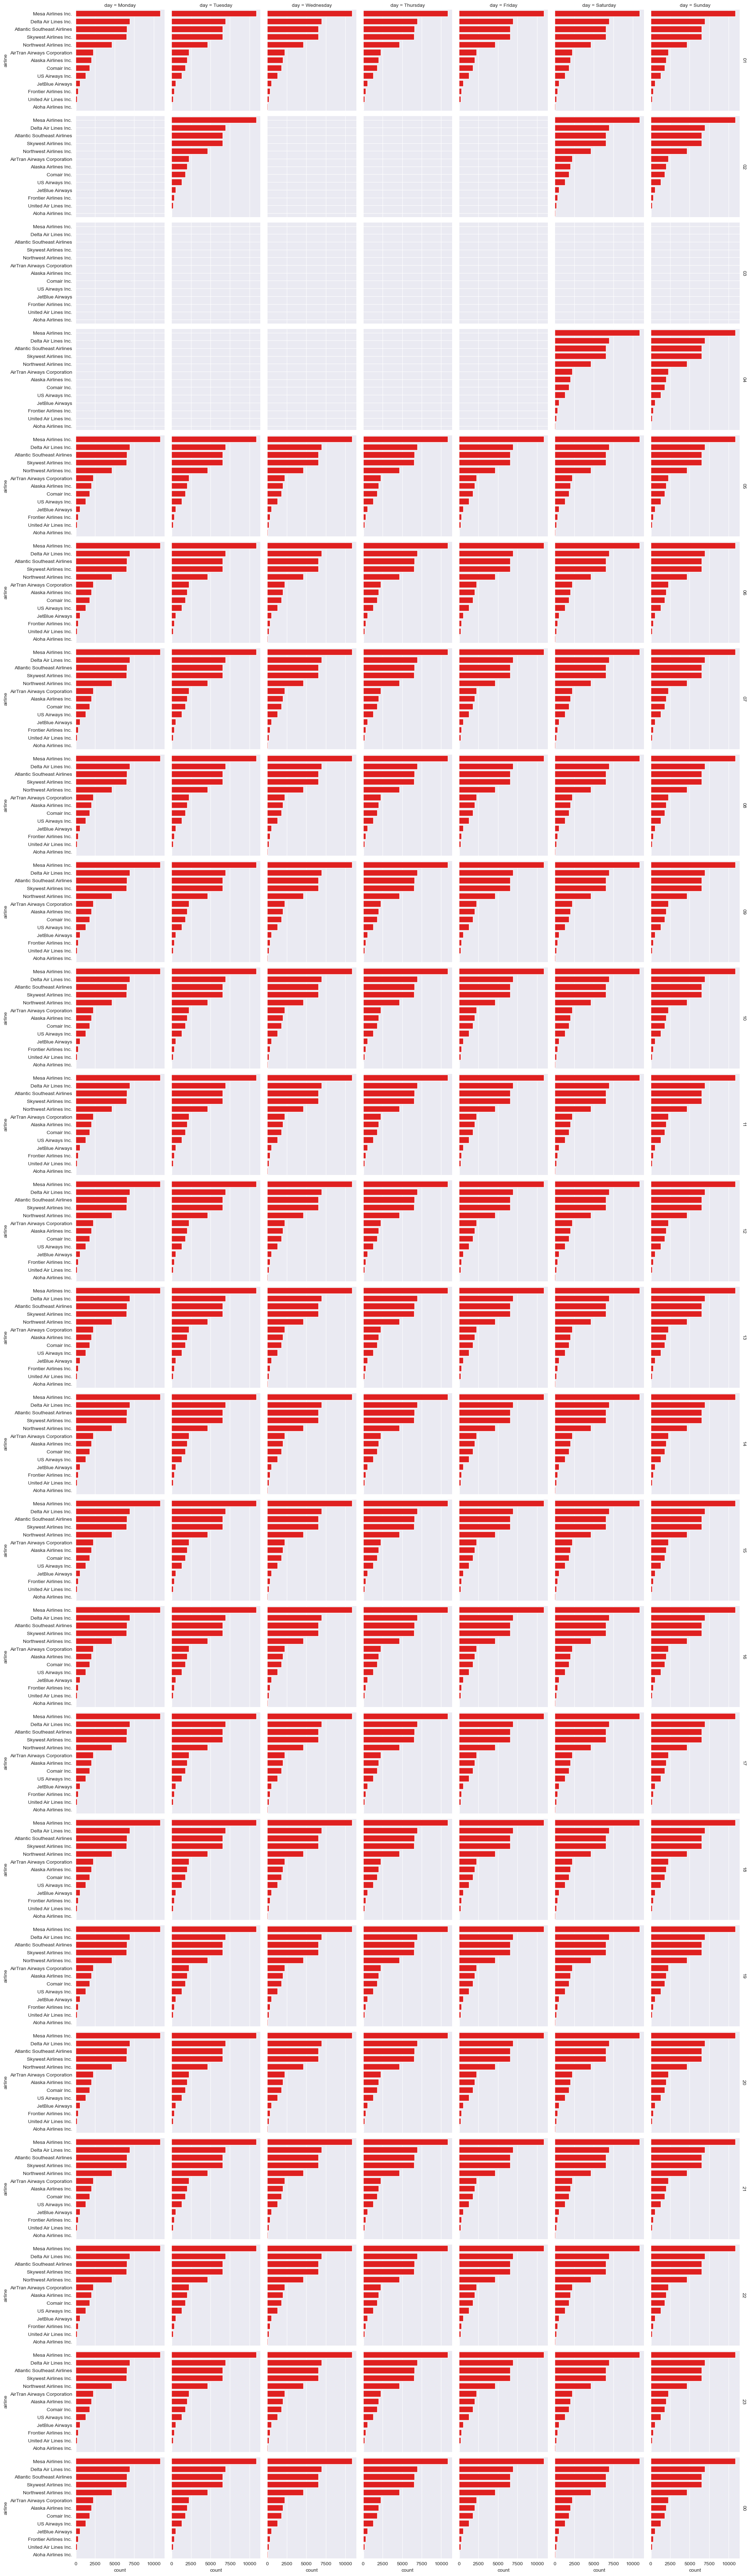

In [104]:
# Let's us explore the relationships among; day, departure hour, and airlines 
g = sb.FacetGrid(data=cancelled_flights, row= 'crsdephour', col= 'day', margin_titles= True)
g.map(sb.countplot, data=cancelled_flights, y='airline', color='red', order= order_airline)
g.set_titles('{col_name}', '{row_name}');

* This comfirms that the best flight periods are 2am - 5am, between Wednesday and Friday.

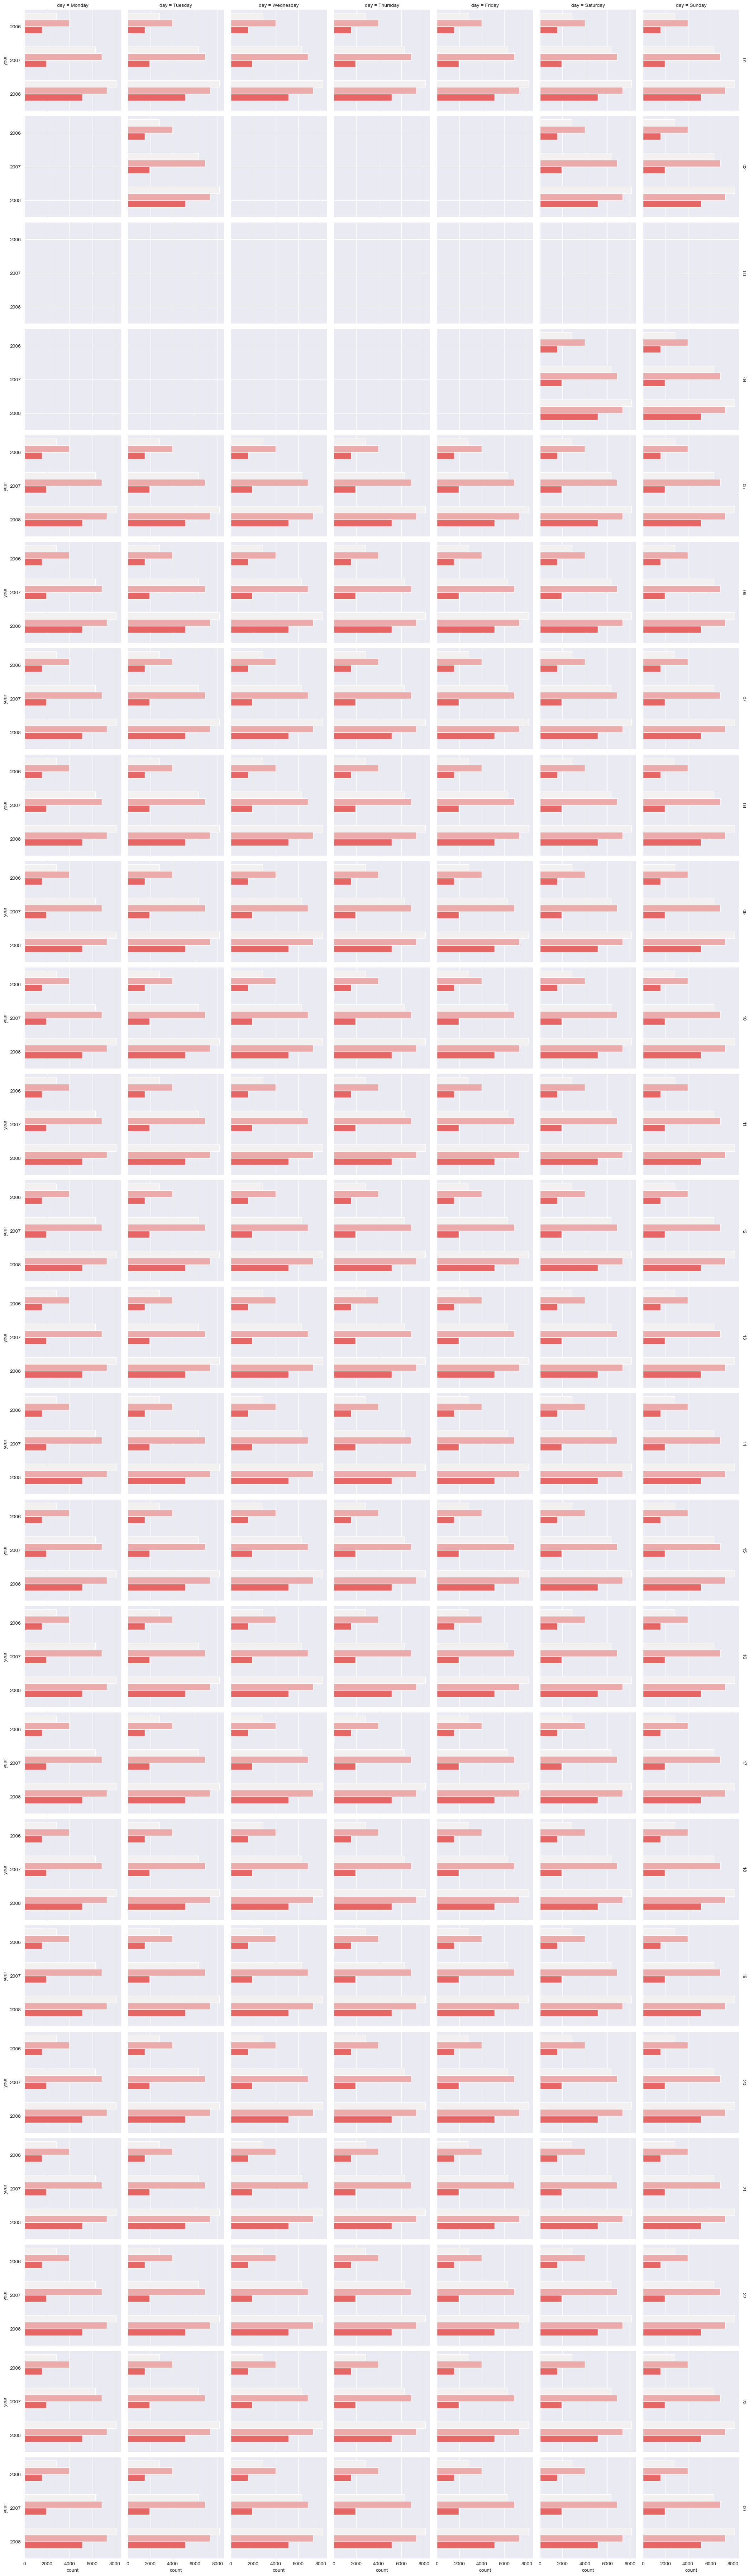

In [105]:
# Let's us explore the relationships among; day, departure hour, year, and cancelled flights 

g = sb.FacetGrid(data=cancelled_flights, row= 'crsdephour', col= 'day', margin_titles= True)
g.map(sb.countplot, data=cancelled_flights, y='year', color= 'red',hue= 'cancellationcode')
g.set_titles('{col_name}', '{row_name}');

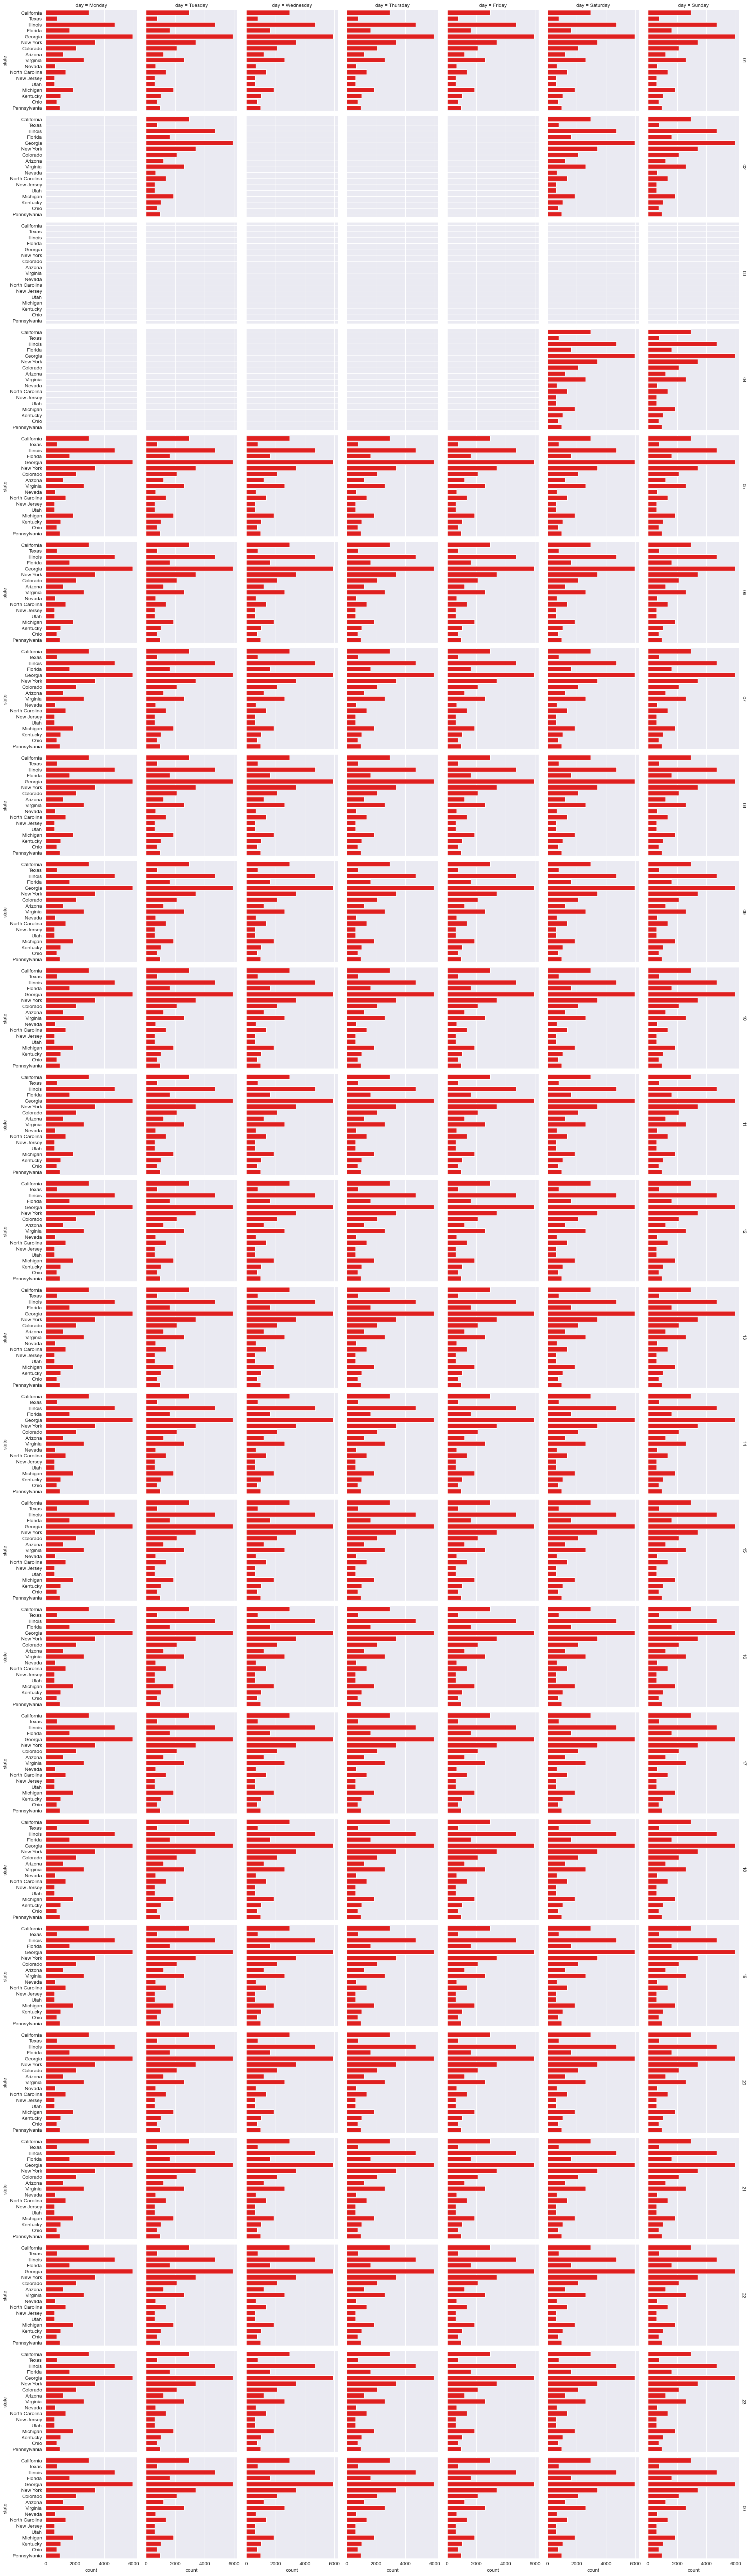

In [106]:
# Let's us explore the relationships among; day, departure hour, and state for cancelled flights 
g = sb.FacetGrid(data=cancelled_flights, row= 'crsdephour', col= 'day', margin_titles= True)
g.map(sb.countplot, data=cancelled_flights, y='state', color='red', order= state_order)
g.set_titles('{col_name}', '{row_name}');

Would it be possible to identify the best airports where Mesa Airlines Inc. operates, despite their poor record of cancelled flights?

In [107]:
# filttering for the Saturday scheduled flights for Mesa Airlines
cancelled_flights_sub = cancelled_flights[(cancelled_flights.airline == 'Mesa Airlines Inc.')
                                          & (cancelled_flights.day == 'Saturday')]
cancelled_flights_sub.head()

year     month crsdeptime  distance cancelled cancellationcode diverted  \
7471  2008     March      05:34      1009       yes          carrier       no   
8164  2007     March      08:50       347       yes          carrier       no   
8470  2008  February      06:00       347       yes          carrier       no   
9122  2008     April      08:45       347       yes          carrier       no   
9187  2006     April      06:05       843       yes          carrier       no   

                    origin_airport         city             airline  ...  \
7471  George Bush Intercontinental      Houston  Mesa Airlines Inc.  ...   
8164         El Paso International      El Paso  Mesa Airlines Inc.  ...   
8470         El Paso International      El Paso  Mesa Airlines Inc.  ...   
9122         El Paso International      El Paso  Mesa Airlines Inc.  ...   
9187     San Antonio International  San Antonio  Mesa Airlines Inc.  ...   

        manufacturer            aircraft_type engine_type airplane_issue_year  \
7471  BOMBARDIER INC  Fixed Wing Multi-Engine   Turbo-Fan                2004   
8164  BOMBARDIER INC  Fixed Wing Multi-Engine   Turbo-Fan                2004   
8470  BOMBARDIER INC  Fixed Wing Multi-Engine   Turbo-Fan                2004   
9122             NaN                      NaN         NaN                 NaN   
9187  BOMBARDIER INC  Fixed Wing Multi-Engine   Turbo-Fan                None   

           date       day crsdephour  state               destination_airport  \
7471 2008-03-22  Saturday         05  Texas  Phoenix Sky Harbor International   
8164 2007-03-24  Saturday         08  Texas  Phoenix Sky Harbor International   
8470 2008-02-02  Saturday         06  Texas  Phoenix Sky Harbor International   
9122 2008-04-19  Saturday         08  Texas  Phoenix Sky Harbor International   
9187 2006-04-01  Saturday         06  Texas  Phoenix Sky Harbor International   

     log_distance  
7471     3.003891  
8164     2.540329  
8470     2.540329  
9122     2.540329  
9187     2.925828  

[5 rows x 21 columns]

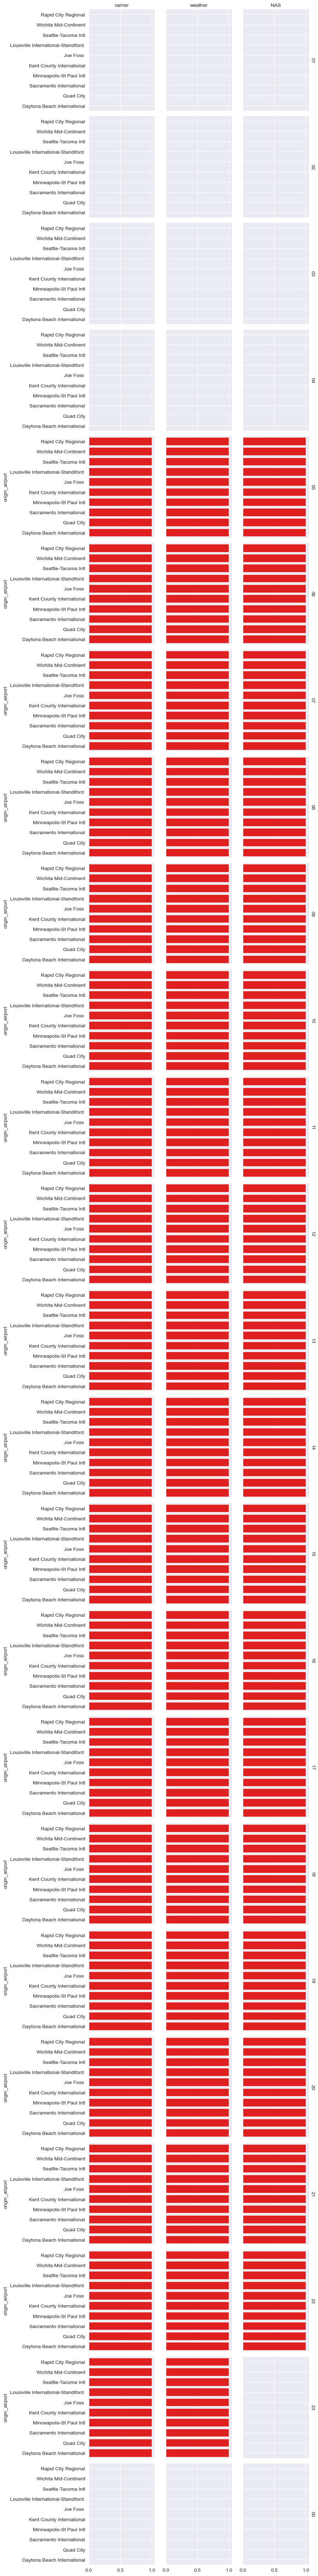

In [108]:
# exploring the best 10 airports (with the least cancelled flights)
order_sub = cancelled_flights_sub.origin_airport.value_counts().index[-10:]
g = sb.FacetGrid(data=cancelled_flights_sub, row= 'crsdephour', col= 'cancellationcode', margin_titles= True)
g.map(sb.countplot, data=cancelled_flights_sub, y='origin_airport', color='red',order= order_sub)
g.set_titles(col_template='{col_name}',row_template='{row_name}');

* We saw that it's possible to complete flights even with the worst Airline.
* For 100% Flight completion rate, Users are adviced to book flights on Saturdays with Mesa Airline, around 12am - 4am.
* Preferred airports are ordererd from least to best; 
        1. 'Rapid City Regional'
        2. 'Wichita Mid-Continent'
        3. 'Seattle-Tacoma Intl', 
        4. 'Louisville International-Standiford '
        5. 'Joe Foss ', 
        6. 'Kent County International'
        7. 'Minneapolis-St Paul Intl'
        8. 'Sacramento International'
        9. 'Quad City'
        10. 'Daytona Beach International'.

> **It is necessary to explore Airlines (Southwest > American Airways > Expressjet Airlines > American Eagle > Continental Air) with 100% flight completion. We will demonstrate the relationship in terms of departure hour, day and airports**


In [109]:
# Creating a dataframe for this analysis.

perfect_airlines = ['Southwest Airlines Co.', 'American Airlines Inc.', 'Expressjet Airlines Inc.',
                    'American Eagle Airlines Inc.', 'Continental Air Lines Inc.']

flight_data_perfect = flight_data[flight_data.airline.isin(perfect_airlines)]
flight_data_perfect.head()

year    month crsdeptime  distance cancelled cancellationcode diverted  \
10411  2006    March      15:55      1009        no             None       no   
10412  2006    April      15:45      1009        no             None       no   
10413  2006    April      19:45      1009        no             None       no   
10414  2007  January      16:05      1009        no             None       no   
10415  2007  January      19:25      1009        no             None       no   

                     origin_airport     city                   airline  ...  \
10411  George Bush Intercontinental  Houston  Expressjet Airlines Inc.  ...   
10412  George Bush Intercontinental  Houston  Expressjet Airlines Inc.  ...   
10413  George Bush Intercontinental  Houston  Expressjet Airlines Inc.  ...   
10414  George Bush Intercontinental  Houston  Expressjet Airlines Inc.  ...   
10415  George Bush Intercontinental  Houston  Expressjet Airlines Inc.  ...   

      manufacturer            aircraft_type engine_type airplane_issue_year  \
10411      EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan                2004   
10412      EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan                2004   
10413      EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan                2004   
10414      EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan                2004   
10415      EMBRAER  Fixed Wing Multi-Engine   Turbo-Fan                2004   

            date      day crsdephour  state               destination_airport  \
10411 2006-03-12   Sunday         15  Texas  Phoenix Sky Harbor International   
10412 2006-04-03   Monday         15  Texas  Phoenix Sky Harbor International   
10413 2006-04-21   Friday         19  Texas  Phoenix Sky Harbor International   
10414 2007-01-19   Friday         16  Texas  Phoenix Sky Harbor International   
10415 2007-01-16  Tuesday         19  Texas  Phoenix Sky Harbor International   

      log_distance  
10411     3.003891  
10412     3.003891  
10413     3.003891  
10414     3.003891  
10415     3.003891  

[5 rows x 21 columns]

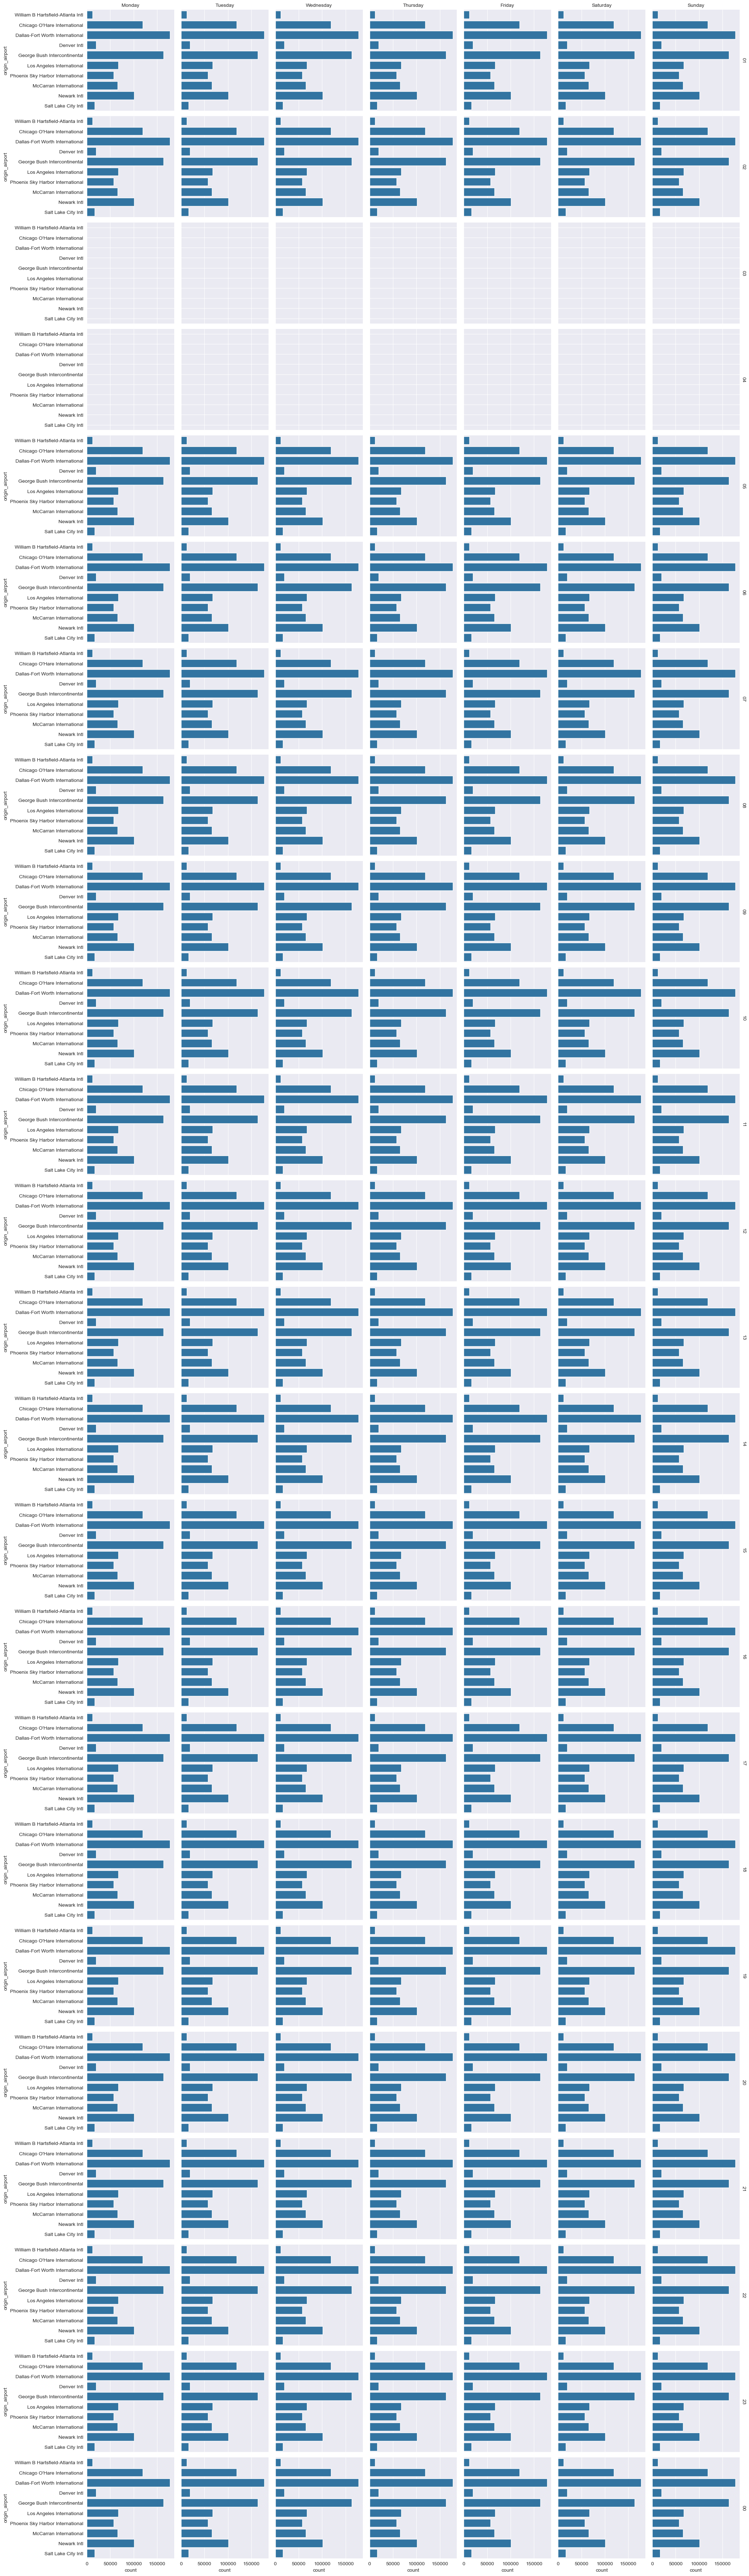

In [110]:
# Perfect Airlines by Top Airports.

g = sb.FacetGrid(data=flight_data_perfect, col= 'day', row= 'crsdephour', margin_titles= True)
g.map(sb.countplot, data=flight_data_perfect, y='origin_airport', order= top_airport)
g.set_titles(col_template='{col_name}',row_template='{row_name}');

* The best performing airlines appear to have a window between 3am - 5am. This could be rest period for the flight crew, otherwise, passengers could exploit this window for improved experience.
* Passengers could also use less busy airports (William B Hartsfield-Atlanta Intl', 'Denver Intl', 'Salt Lake City Intl').

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Yes, we saw that at particular times of the day, even the worst airlines were able to complete flights.

### Were there any interesting or surprising interactions between features?

Well, we saw that the perfect airlines had a free window between 3am - 5am daily.

## Conclusions

* 5,206,205 flights were sceduled for the period reviewed.
* 44,110 (1%) flights were cancelled.
* 41% of the Cancelled flights were due to Airlines, 39% were due to weather.
* Cancelled flights are based on the number of flights scheduled per time; Scheduled hours (i.e, 3am with less than 0.0001% flights) with lesser scheduled flights experience less or almost zero cancelled flights.
* Southwest Airlines had the most number of scheduled flights, with 100% completion rate
* California and Texas were the busiest cities with over 1.4 million scheduled flights.
* William B Intl Airport had the most cancelled flights due to Carrier (Airline).
* Generally, cancelled flights increase from 2006 through 2008, and was seen to reduce from January through April.
* Saturday recorded the least number of cancelled flights for any reason.
* Mesa Airline had the most cancelled flights due to carrier (more than 5000).
* Most of the scheduled flights were between 200 - 800 miles.
* 3am is the best time to schedule flights for any airline, state, airport or day.
* The best flight periods are 2am - 5am, between Wednesday and Friday.
* The best performing Airlines have a free window between 3am - 5am that could be utilized for flights.
* For the worst airline (Mesa Airlines Inc), flights should be scheduled on Saturday within 12am - 4am.
* Preferred airports, when using Mesa Airlines Inc. are;
      1. 'Rapid City Regional'
      2. 'Wichita Mid-Continent'
      3. 'Seattle-Tacoma Intl', 
      4. 'Louisville International-Standiford '
      5. 'Joe Foss ', 
      6. 'Kent County International'
      7. 'Minneapolis-St Paul Intl'
      8. 'Sacramento International'
      9. 'Quad City'
      10. 'Daytona Beach International'.

